In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from tqdm import tqdm
import time

In [2]:
train = pd.read_csv("CSV_train.csv",low_memory=False,delimiter=';')
test=pd.read_csv("CSV_test.csv",low_memory=False,delimiter=',')
hidden=pd.read_csv("CSV_hidden_test.csv",low_memory=False,delimiter=',')

In [3]:
hidden

WELL   DEPTH_MD        X_LOC      Y_LOC        Z_LOC  \
0       15/9-23  1518.2800  433906.7500  6460000.5 -1493.241821   
1       15/9-23  1518.4320  433906.7500  6460000.5 -1493.393799   
2       15/9-23  1518.5840  433906.7500  6460000.5 -1493.545776   
3       15/9-23  1518.7360  433906.7500  6460000.5 -1493.697754   
4       15/9-23  1518.8880  433906.7500  6460000.5 -1493.849609   
...         ...        ...          ...        ...          ...   
122392   35/9-7  2973.2988  536096.0625  6793022.0 -2943.444580   
122393   35/9-7  2973.4508  536096.0625  6793022.0 -2943.595947   
122394   35/9-7  2973.6028  536096.0625  6793022.0 -2943.747559   
122395   35/9-7  2973.7548  536096.0625  6793022.0 -2943.899170   
122396   35/9-7  2973.9068  536096.0625  6793022.0 -2944.050537   

                GROUP  FORMATION       CALI  RSHA      RMED  ...         ROP  \
0       HORDALAND GP.  Skade Fm.  15.506232   NaN       NaN  ...  146.526276   
1       HORDALAND GP.  Skade Fm.  18.524611   NaN       NaN  ...  147.605148   
2       HORDALAND GP.  Skade Fm.  18.855669   NaN       NaN  ...  140.783127   
3       HORDALAND GP.  Skade Fm.  19.163353   NaN       NaN  ...  125.159531   
4       HORDALAND GP.  Skade Fm.  18.489744   NaN  0.849849  ...  107.576691   
...               ...        ...        ...   ...       ...  ...         ...   
122392       BAAT GP.  Etive Fm.   8.276272   NaN  2.820439  ...   15.195305   
122393       BAAT GP.  Etive Fm.   8.267273   NaN  3.020778  ...   15.770223   
122394       BAAT GP.  Etive Fm.   8.250099   NaN  2.795711  ...   16.418465   
122395       BAAT GP.  Etive Fm.        NaN   NaN  2.658694  ...   17.037945   
122396       BAAT GP.  Etive Fm.        NaN   NaN  2.802693  ...   17.618532   

               DTS      DCAL      DRHO  MUDWEIGHT      RMIC        ROPA  RXO  \
0       326.451263 -1.993768  0.109706        NaN       NaN   88.968864  NaN   
1       322.926361  1.024611 -0.006418        NaN       NaN   92.287186  NaN   
2       325.283142  1.355668  0.022769        NaN       NaN   95.605499  NaN   
3       334.233185  1.663353  0.024972        NaN       NaN   98.923821  NaN   
4       330.952362  0.989743  0.024527        NaN       NaN  102.242142  NaN   
...            ...       ...       ...        ...       ...         ...  ...   
122392  136.911575       NaN  0.502458        NaN  2.311106   24.306124  NaN   
122393  137.583923       NaN  0.374753        NaN  1.853418   22.201078  NaN   
122394  138.310898       NaN  0.211487        NaN  1.325961   20.096741  NaN   
122395  137.592819       NaN  0.147950        NaN  1.260347   17.992323  NaN   
122396  136.129761       NaN  0.174232        NaN  1.266063   15.889325  NaN   

        FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  
0                                  65000                                3.0  
1                                  65000                                3.0  
2                                  65000                                3.0  
3                                  65000                                3.0  
4                                  65000                                3.0  
...                                  ...                                ...  
122392                             65000                                2.0  
122393                             65000                                2.0  
122394                             65000                                2.0  
122395                             65000                                2.0  
122396                             65000                                2.0  

[122397 rows x 29 columns]

In [4]:
Alldata=pd.concat([train, test], axis=0).reset_index()
Alldata.loc[train.index, 'Dataset'] = 'Train'
Alldata.loc[train.index.max()+1:, 'Dataset'] = 'Test'

In [5]:
Alldata

index     WELL   DEPTH_MD         X_LOC      Y_LOC        Z_LOC  \
0             0  15/9-13   494.5280  437641.96875  6470972.5  -469.501831   
1             1  15/9-13   494.6800  437641.96875  6470972.5  -469.653809   
2             2  15/9-13   494.8320  437641.96875  6470972.5  -469.805786   
3             3  15/9-13   494.9840  437641.96875  6470972.5  -469.957794   
4             4  15/9-13   495.1360  437641.96875  6470972.5  -470.109772   
...         ...      ...        ...           ...        ...          ...   
1307292  136781   35/9-8  3224.3896  536225.93750  6794880.5 -3199.876465   
1307293  136782   35/9-8  3224.5416  536225.93750  6794880.5 -3200.028320   
1307294  136783   35/9-8  3224.6936  536225.93750  6794880.5 -3200.180176   
1307295  136784   35/9-8  3224.8456  536225.93750  6794880.5 -3200.332031   
1307296  136785   35/9-8  3224.9976  536225.93750  6794880.5 -3200.483887   

                GROUP    FORMATION       CALI  RSHA  ...         DTS  DCAL  \
0        NORDLAND GP.          NaN  19.480835   NaN  ...         NaN   NaN   
1        NORDLAND GP.          NaN  19.468800   NaN  ...         NaN   NaN   
2        NORDLAND GP.          NaN  19.468800   NaN  ...         NaN   NaN   
3        NORDLAND GP.          NaN  19.459282   NaN  ...         NaN   NaN   
4        NORDLAND GP.          NaN  19.453100   NaN  ...         NaN   NaN   
...               ...          ...        ...   ...  ...         ...   ...   
1307292      BAAT GP.  Rannoch Fm.   8.497800   NaN  ...  118.669212   NaN   
1307293      BAAT GP.  Rannoch Fm.   8.497800   NaN  ...  118.468925   NaN   
1307294      BAAT GP.  Rannoch Fm.   8.497800   NaN  ...  118.163177   NaN   
1307295      BAAT GP.  Rannoch Fm.   8.497800   NaN  ...  117.655937   NaN   
1307296      BAAT GP.  Rannoch Fm.   8.497800   NaN  ...  117.002289   NaN   

             DRHO  MUDWEIGHT      RMIC       ROPA  RXO  \
0       -0.574928        NaN       NaN        NaN  NaN   
1       -0.570188        NaN       NaN        NaN  NaN   
2       -0.574245        NaN       NaN        NaN  NaN   
3       -0.586315        NaN       NaN        NaN  NaN   
4       -0.597914        NaN       NaN        NaN  NaN   
...           ...        ...       ...        ...  ...   
1307292  0.063478        NaN  2.618309  33.523922  NaN   
1307293  0.056791        NaN  2.620221  32.643795  NaN   
1307294  0.002499        NaN  2.629171  31.763380  NaN   
1307295  0.003363        NaN  2.521121  30.884350  NaN   
1307296  0.001724        NaN  2.356035  29.962900  NaN   

         FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  \
0                                 65000.0                                1.0   
1                                 65000.0                                1.0   
2                                 65000.0                                1.0   
3                                 65000.0                                1.0   
4                                 65000.0                                1.0   
...                                   ...                                ...   
1307292                               NaN                                NaN   
1307293                               NaN                                NaN   
1307294                               NaN                                NaN   
1307295                               NaN                                NaN   
1307296                               NaN                                NaN   

         Dataset  
0          Train  
1          Train  
2          Train  
3          Train  
4          Train  
...          ...  
1307292     Test  
1307293     Test  
1307294     Test  
1307295     Test  
1307296     Test  

[1307297 rows x 31 columns]

In [6]:
train_wells = Alldata['WELL'][Alldata.Dataset=='Train'].unique()
print('No of train wells: %s' % len(train_wells))

No of train wells: 98


In [7]:
test_wells = Alldata['WELL'][Alldata.Dataset=='Test'].unique()
print('No of test wells: %s' % len(test_wells))

No of test wells: 10


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [9]:
train.isnull().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

In [10]:
#percentage missing values
empty_data = train[train.isna().any(axis=1)]
per_missing = train.isnull().sum()/len(train)*100
print(per_missing)

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 0.920538
Y_LOC                                 0.920538
Z_LOC                                 0.920538
GROUP                                 0.109183
FORMATION                            11.703777
CALI                                  7.507576
RSHA                                 46.121822
RMED                                  3.331280
RDEP                                  0.941042
RHOB                                 13.777658
GR                                    0.000000
SGR                                  94.074981
NPHI                                 34.608987
PEF                                  42.615490
DTC                                   6.908350
SP                                   26.164983
BS                                   41.678720
ROP                                  54.287401
DTS                                  85.082327
DCAL         

In [11]:
# statistics of the data
train.describe()

DEPTH_MD         X_LOC         Y_LOC         Z_LOC          CALI  \
count  1.170511e+06  1.159736e+06  1.159736e+06  1.159736e+06  1.082634e+06   
mean   2.184087e+03  4.856310e+05  6.681276e+06 -2.138527e+03  1.318568e+01   
std    9.971821e+02  3.455641e+04  1.281524e+05  9.709426e+02  3.798907e+00   
min    1.360860e+02  4.268988e+05  6.406641e+06 -5.395563e+03  2.344000e+00   
25%    1.418597e+03  4.547996e+05  6.591327e+06 -2.811502e+03  9.429712e+00   
50%    2.076605e+03  4.769203e+05  6.737311e+06 -2.042785e+03  1.255575e+01   
75%    2.864393e+03  5.201532e+05  6.784886e+06 -1.391866e+03  1.671075e+01   
max    5.436632e+03  5.726328e+05  6.856661e+06 -1.110860e+02  2.827900e+01   

                RSHA          RMED          RDEP          RHOB            GR  \
count  630650.000000  1.131518e+06  1.159496e+06  1.009242e+06  1.170511e+06   
mean       10.694664  4.986978e+00  1.069103e+01  2.284987e+00  7.091370e+01   
std       100.642597  5.467269e+01  1.139480e+02  2.532835e-01  3.423149e+01   
min         0.000100 -8.418695e-03  3.170056e-02  7.209712e-01  1.092843e-01   
25%         0.854120  9.140862e-01  9.102396e-01  2.092203e+00  4.762722e+01   
50%         1.399020  1.443584e+00  1.439000e+00  2.321228e+00  6.836763e+01   
75%         3.099348  2.680930e+00  2.557220e+00  2.488580e+00  8.903551e+01   
max      2193.904541  1.988616e+03  1.999887e+03  3.457820e+00  1.076964e+03   

       ...            ROP            DTS           DCAL           DRHO  \
count  ...  535071.000000  174613.000000  298833.000000  987857.000000   
mean   ...     137.367965     204.655019       1.223849       0.012196   
std    ...    1539.383558      71.068461      54.372859       7.477798   
min    ...      -0.117977      69.163177     -12.215459   -7429.338867   
25%    ...       5.628000     155.936707       0.148438      -0.009253   
50%    ...      17.799999     188.200653       0.557320       0.001752   
75%    ...      34.812794     224.645081       1.299655       0.021702   
max    ...   47015.125000     676.578125   10011.422852       2.836938   

           MUDWEIGHT           RMIC           ROPA            RXO  \
count  316151.000000  176160.000000  192325.000000  327427.000000   
mean        1.216329       7.796809      23.505069     -95.779496   
std        10.180834      89.741807      22.632800     348.980030   
min         0.125818       0.056586    -999.250122    -999.900024   
25%         0.143792       0.891272      11.281895       0.687681   
50%         0.155774       1.967156      20.131153       1.366672   
75%         1.168307       5.084564      31.138481       3.420790   
max       185.730927   10000.000000     742.797852   35930.671875   

       FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  
count                      1.170511e+06                       1.170332e+06  
mean                       6.138598e+04                       1.164258e+00  
std                        1.389170e+04                       4.451180e-01  
min                        3.000000e+04                       1.000000e+00  
25%                        6.500000e+04                       1.000000e+00  
50%                        6.500000e+04                       1.000000e+00  
75%                        6.500000e+04                       1.000000e+00  
max                        9.900000e+04                       3.000000e+00  

[8 rows x 26 columns]

In [12]:
def understand_dist(dataset,feature_type):
    
    if feature_type == "Categorical":
        
        categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']   
        dataframes=[]
        for feature in categorical_features:
            dataframe=dataset[feature].value_counts().rename_axis(feature).reset_index(name='counts')
            dataframes.append(dataframe)
            
            plt.figure(figsize=(10,4))
            sns.countplot(x=feature,data = dataset)
            plt.show()
            print(dataframe,'\n')

       
            
        
            
    elif feature_type == "Numeric":
        
        numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
        
        for feature in numerical_features:
            plt.figure(figsize=(10,4))
            sns.distplot(dataset[feature])
            plt.show()
            print("Description :\n\n"+str(dataset[feature].describe())+"\n\n")

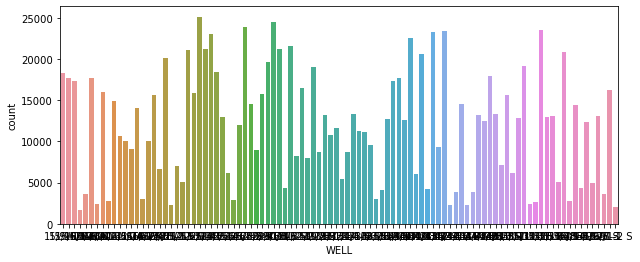

        WELL  counts
0     25/2-7   25131
1     29/6-1   24464
2     25/7-2   23879
3    35/11-6   23544
4     34/2-4   23403
..       ...     ...
93  25/11-15    2284
94  34/5-1 S    2273
95  34/3-1 A    2251
96   7/1-2 S    2040
97    16/1-2    1734

[98 rows x 2 columns] 



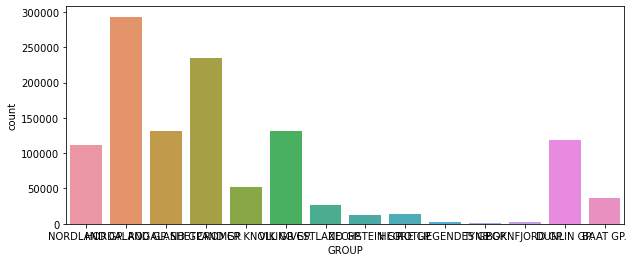

               GROUP  counts
0      HORDALAND GP.  293155
1       SHETLAND GP.  234028
2         VIKING GP.  131999
3       ROGALAND GP.  131944
4         DUNLIN GP.  119085
5       NORDLAND GP.  111490
6   CROMER KNOLL GP.   52320
7           BAAT GP.   35823
8       VESTLAND GP.   26116
9          HEGRE GP.   13913
10     ZECHSTEIN GP.   12238
11     BOKNFJORD GP.    3125
12  ROTLIEGENDES GP.    2792
13          TYNE GP.    1205 



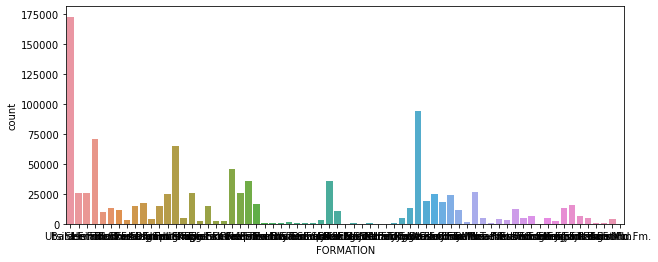

                FORMATION  counts
0              Utsira Fm.  172636
1               Kyrre Fm.   94328
2               Lista Fm.   71080
3             Heather Fm.   65041
4               Skade Fm.   45983
..                    ...     ...
64              Broom Fm.     235
65  Intra Balder Fm. Sst.     177
66            Farsund Fm.     171
67        Flekkefjord Fm.     118
68           Egersund Fm.     105

[69 rows x 2 columns] 



In [13]:
import seaborn as sns
understand_dist(train, "Categorical")

C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


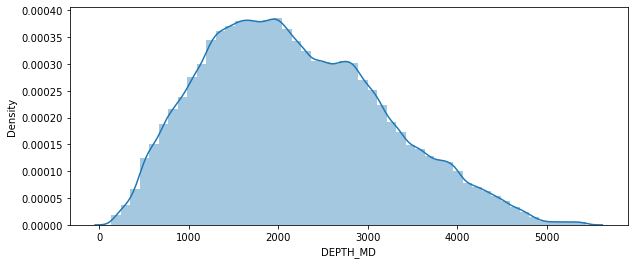

Description :

count    1.170511e+06
mean     2.184087e+03
std      9.971821e+02
min      1.360860e+02
25%      1.418597e+03
50%      2.076605e+03
75%      2.864393e+03
max      5.436632e+03
Name: DEPTH_MD, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


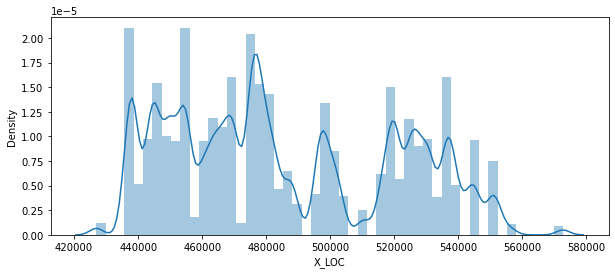

Description :

count    1.159736e+06
mean     4.856310e+05
std      3.455641e+04
min      4.268988e+05
25%      4.547996e+05
50%      4.769203e+05
75%      5.201532e+05
max      5.726328e+05
Name: X_LOC, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


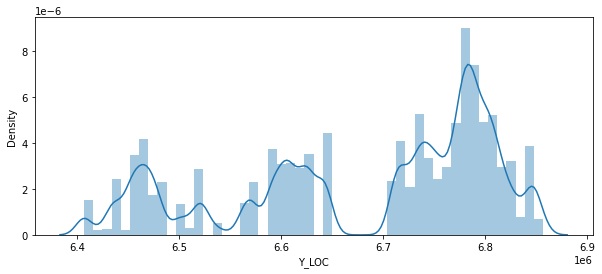

Description :

count    1.159736e+06
mean     6.681276e+06
std      1.281524e+05
min      6.406641e+06
25%      6.591327e+06
50%      6.737311e+06
75%      6.784886e+06
max      6.856661e+06
Name: Y_LOC, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


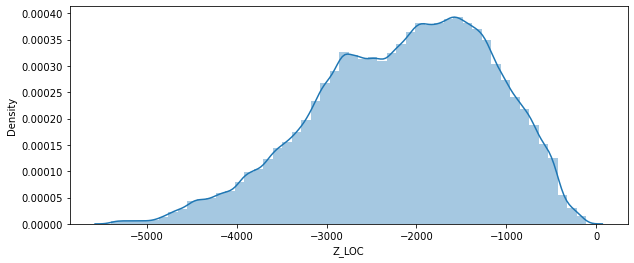

Description :

count    1.159736e+06
mean    -2.138527e+03
std      9.709426e+02
min     -5.395563e+03
25%     -2.811502e+03
50%     -2.042785e+03
75%     -1.391866e+03
max     -1.110860e+02
Name: Z_LOC, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


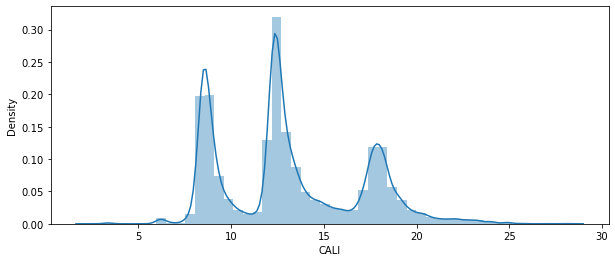

Description :

count    1.082634e+06
mean     1.318568e+01
std      3.798907e+00
min      2.344000e+00
25%      9.429712e+00
50%      1.255575e+01
75%      1.671075e+01
max      2.827900e+01
Name: CALI, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


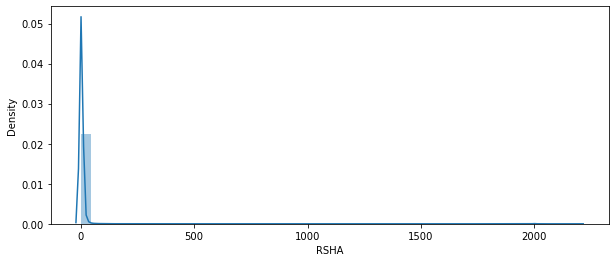

Description :

count    630650.000000
mean         10.694664
std         100.642597
min           0.000100
25%           0.854120
50%           1.399020
75%           3.099348
max        2193.904541
Name: RSHA, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


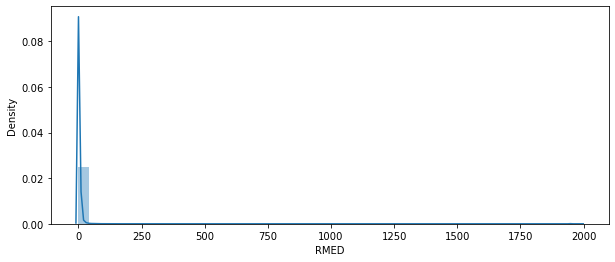

Description :

count    1.131518e+06
mean     4.986978e+00
std      5.467269e+01
min     -8.418695e-03
25%      9.140862e-01
50%      1.443584e+00
75%      2.680930e+00
max      1.988616e+03
Name: RMED, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


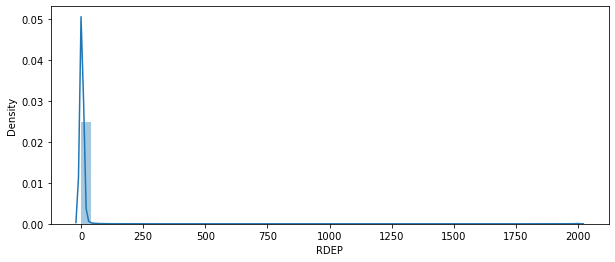

Description :

count    1.159496e+06
mean     1.069103e+01
std      1.139480e+02
min      3.170056e-02
25%      9.102396e-01
50%      1.439000e+00
75%      2.557220e+00
max      1.999887e+03
Name: RDEP, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


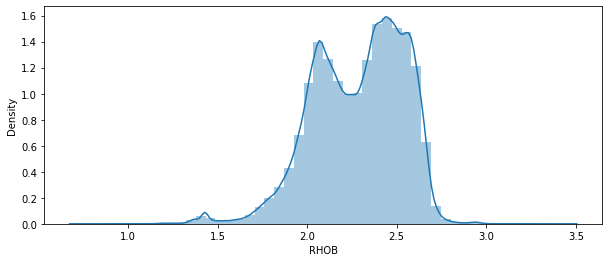

Description :

count    1.009242e+06
mean     2.284987e+00
std      2.532835e-01
min      7.209712e-01
25%      2.092203e+00
50%      2.321228e+00
75%      2.488580e+00
max      3.457820e+00
Name: RHOB, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


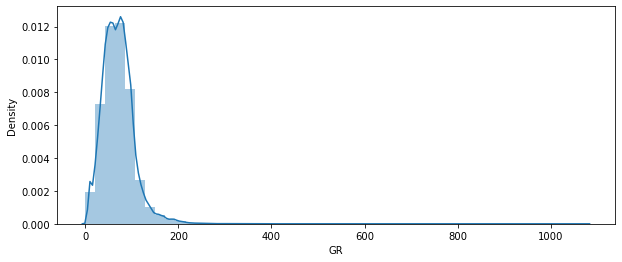

Description :

count    1.170511e+06
mean     7.091370e+01
std      3.423149e+01
min      1.092843e-01
25%      4.762722e+01
50%      6.836763e+01
75%      8.903551e+01
max      1.076964e+03
Name: GR, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


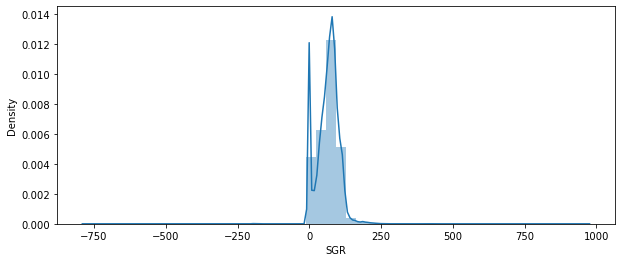

Description :

count    69353.000000
mean        64.895910
std         38.435818
min       -777.985962
25%         42.962429
50%         69.562714
75%         87.910156
max        963.608582
Name: SGR, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


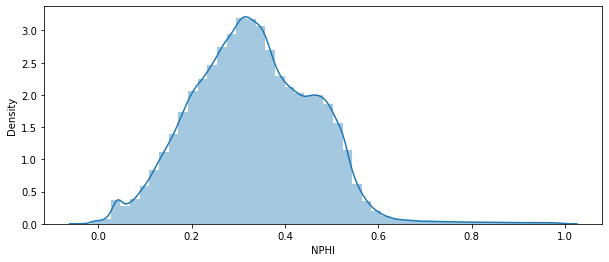

Description :

count    765409.000000
mean          0.331966
std           0.130483
min          -0.035822
25%           0.241365
50%           0.326800
75%           0.422951
max           0.999570
Name: NPHI, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


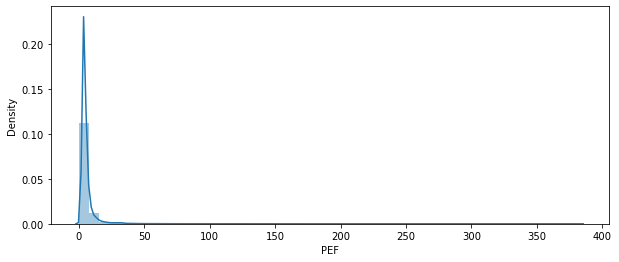

Description :

count    671692.000000
mean          6.319719
std          10.955360
min           0.099718
25%           3.414440
50%           4.313530
75%           5.968794
max         383.129974
Name: PEF, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


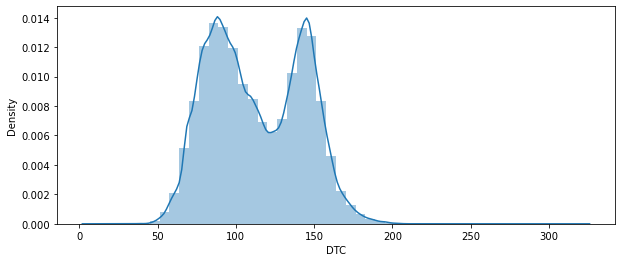

Description :

count    1.089648e+06
mean     1.133581e+02
std      2.999050e+01
min      7.415132e+00
25%      8.782584e+01
50%      1.095852e+02
75%      1.407745e+02
max      3.204789e+02
Name: DTC, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


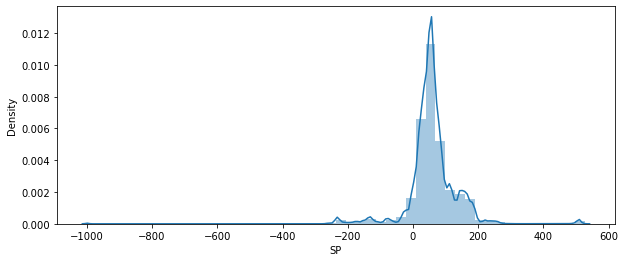

Description :

count    864247.000000
mean         60.033980
std          76.574359
min        -999.000000
25%          32.402981
50%          55.390942
75%          83.393299
max         526.547302
Name: SP, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


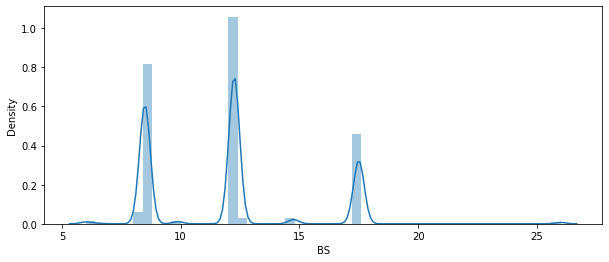

Description :

count    682657.000000
mean         11.931432
std           3.330242
min           6.000000
25%           8.500000
50%          12.250001
75%          12.250001
max          26.000002
Name: BS, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


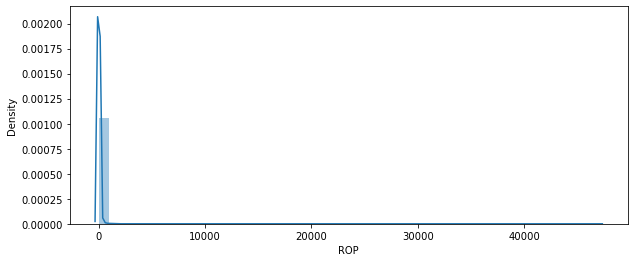

Description :

count    535071.000000
mean        137.367965
std        1539.383558
min          -0.117977
25%           5.628000
50%          17.799999
75%          34.812794
max       47015.125000
Name: ROP, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


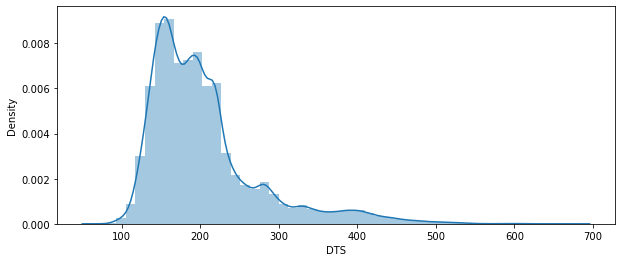

Description :

count    174613.000000
mean        204.655019
std          71.068461
min          69.163177
25%         155.936707
50%         188.200653
75%         224.645081
max         676.578125
Name: DTS, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


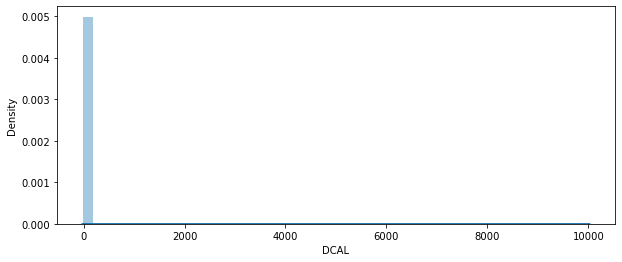

Description :

count    298833.000000
mean          1.223849
std          54.372859
min         -12.215459
25%           0.148438
50%           0.557320
75%           1.299655
max       10011.422852
Name: DCAL, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


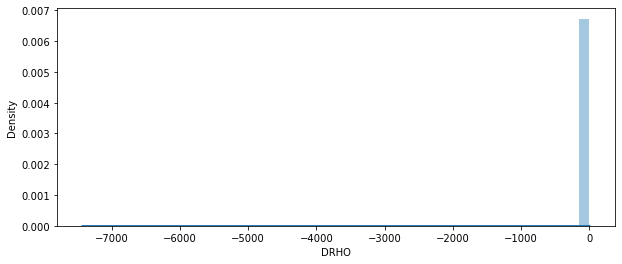

Description :

count    987857.000000
mean          0.012196
std           7.477798
min       -7429.338867
25%          -0.009253
50%           0.001752
75%           0.021702
max           2.836938
Name: DRHO, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


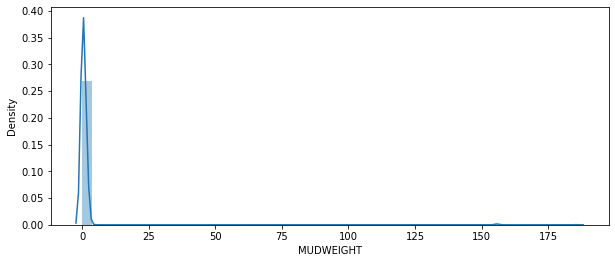

Description :

count    316151.000000
mean          1.216329
std          10.180834
min           0.125818
25%           0.143792
50%           0.155774
75%           1.168307
max         185.730927
Name: MUDWEIGHT, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


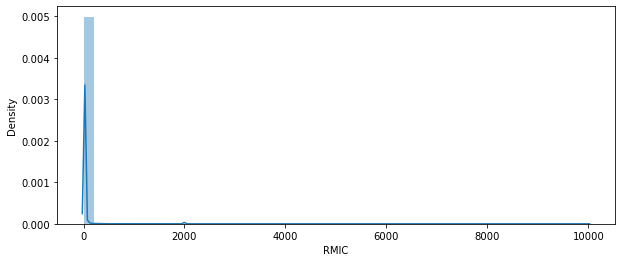

Description :

count    176160.000000
mean          7.796809
std          89.741807
min           0.056586
25%           0.891272
50%           1.967156
75%           5.084564
max       10000.000000
Name: RMIC, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


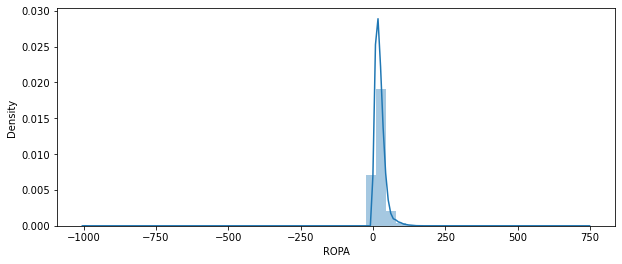

Description :

count    192325.000000
mean         23.505069
std          22.632800
min        -999.250122
25%          11.281895
50%          20.131153
75%          31.138481
max         742.797852
Name: ROPA, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


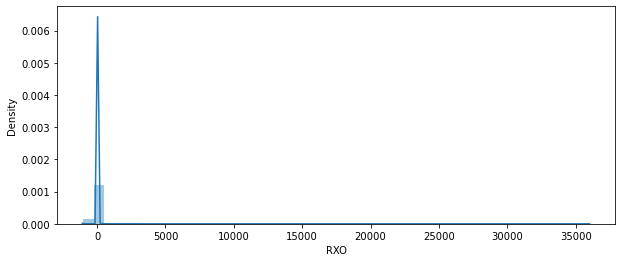

Description :

count    327427.000000
mean        -95.779496
std         348.980030
min        -999.900024
25%           0.687681
50%           1.366672
75%           3.420790
max       35930.671875
Name: RXO, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


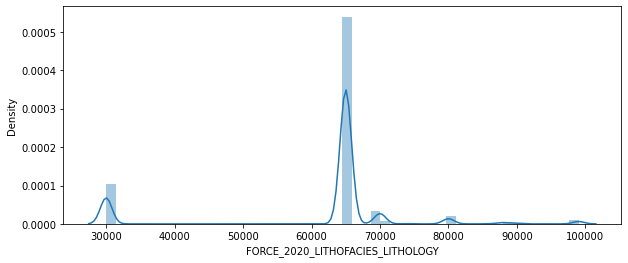

Description :

count    1.170511e+06
mean     6.138598e+04
std      1.389170e+04
min      3.000000e+04
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      9.900000e+04
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: float64




C:\Users\Ayori\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


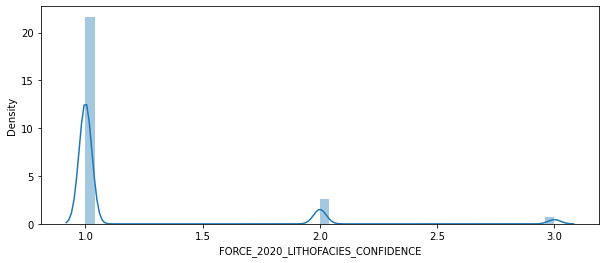

Description :

count    1.170332e+06
mean     1.164258e+00
std      4.451180e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: FORCE_2020_LITHOFACIES_CONFIDENCE, dtype: float64




In [14]:
understand_dist(train, "Numeric")

In [15]:
wells = train['WELL'].unique()
len(wells)

98

# missing values
The data is presented as is and includes a large amount of missing values. Missing data within well logging can arise for a number of reasons including:

Tool failures & problems
Missing by choice (i.e. tools not run due to budgetary constraints)
Human error
Vintage datasets
Issues arising from the borehole environment

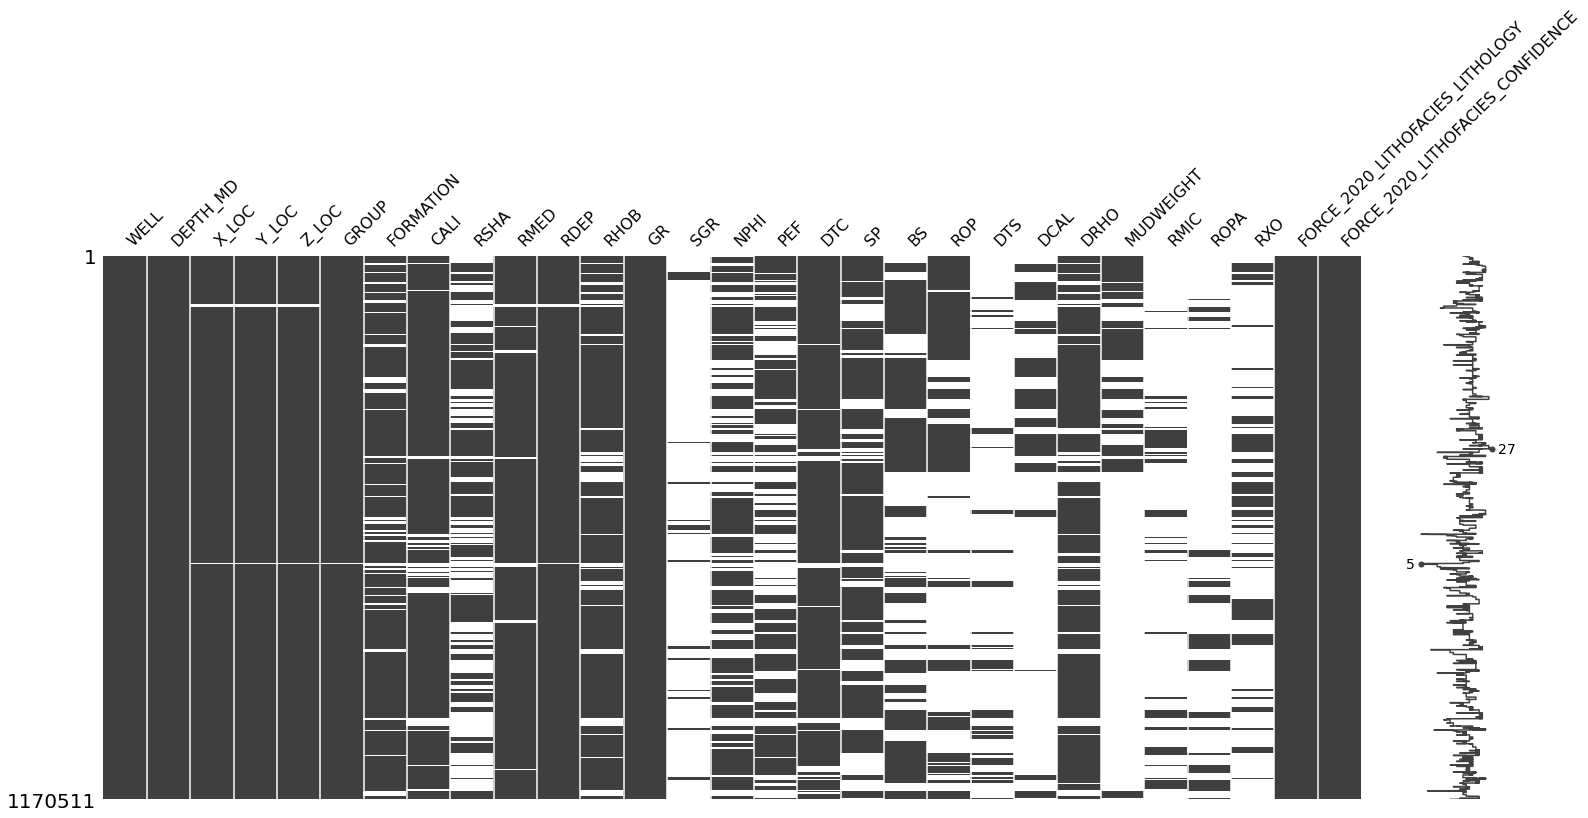

In [16]:
import missingno as msno
msno.matrix(train);

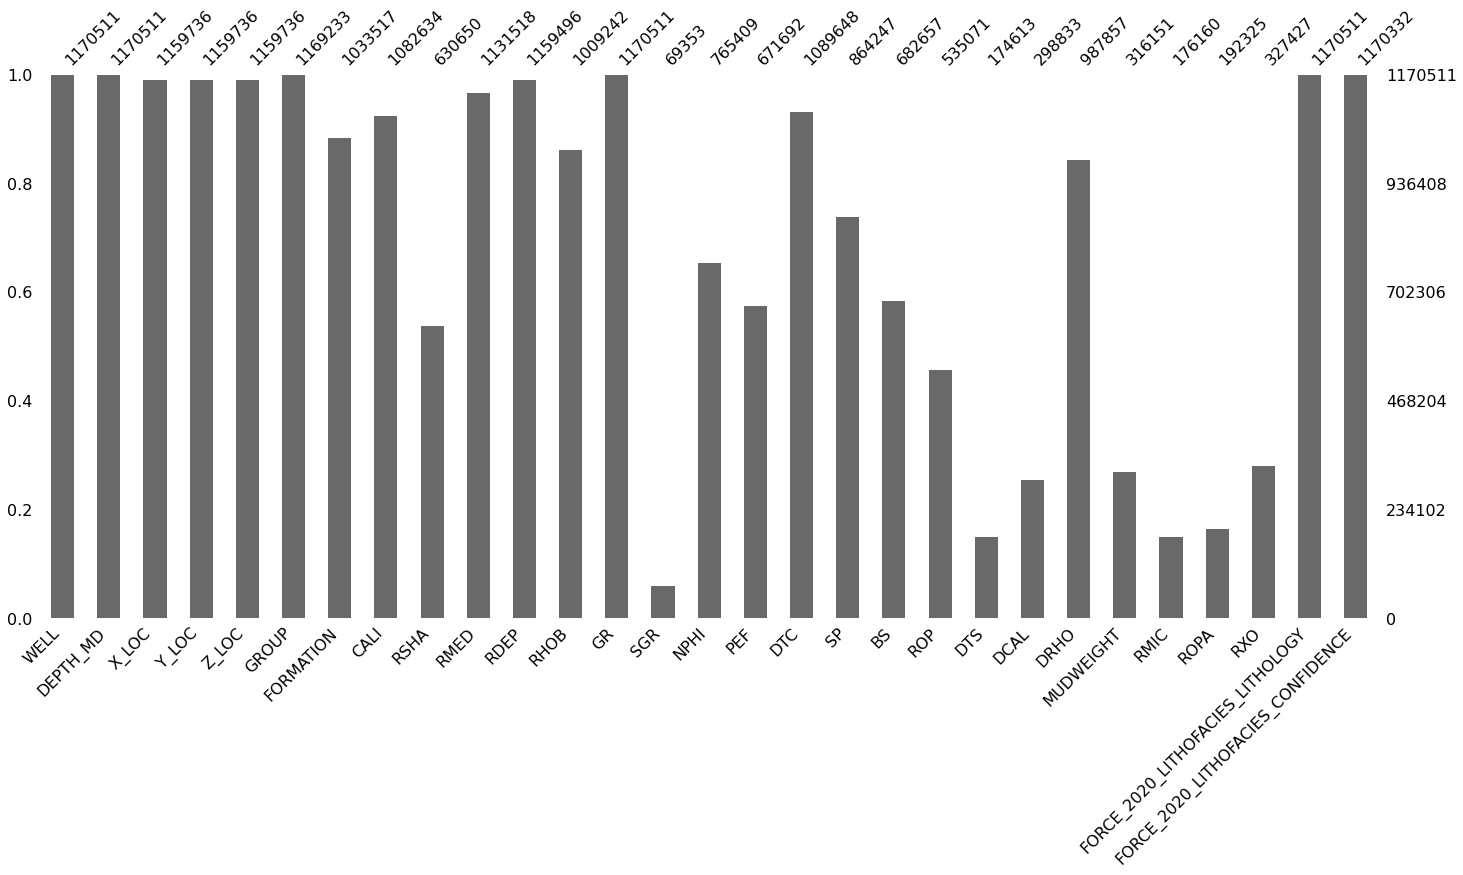

In [17]:
msno.bar(train);

<AxesSubplot:>

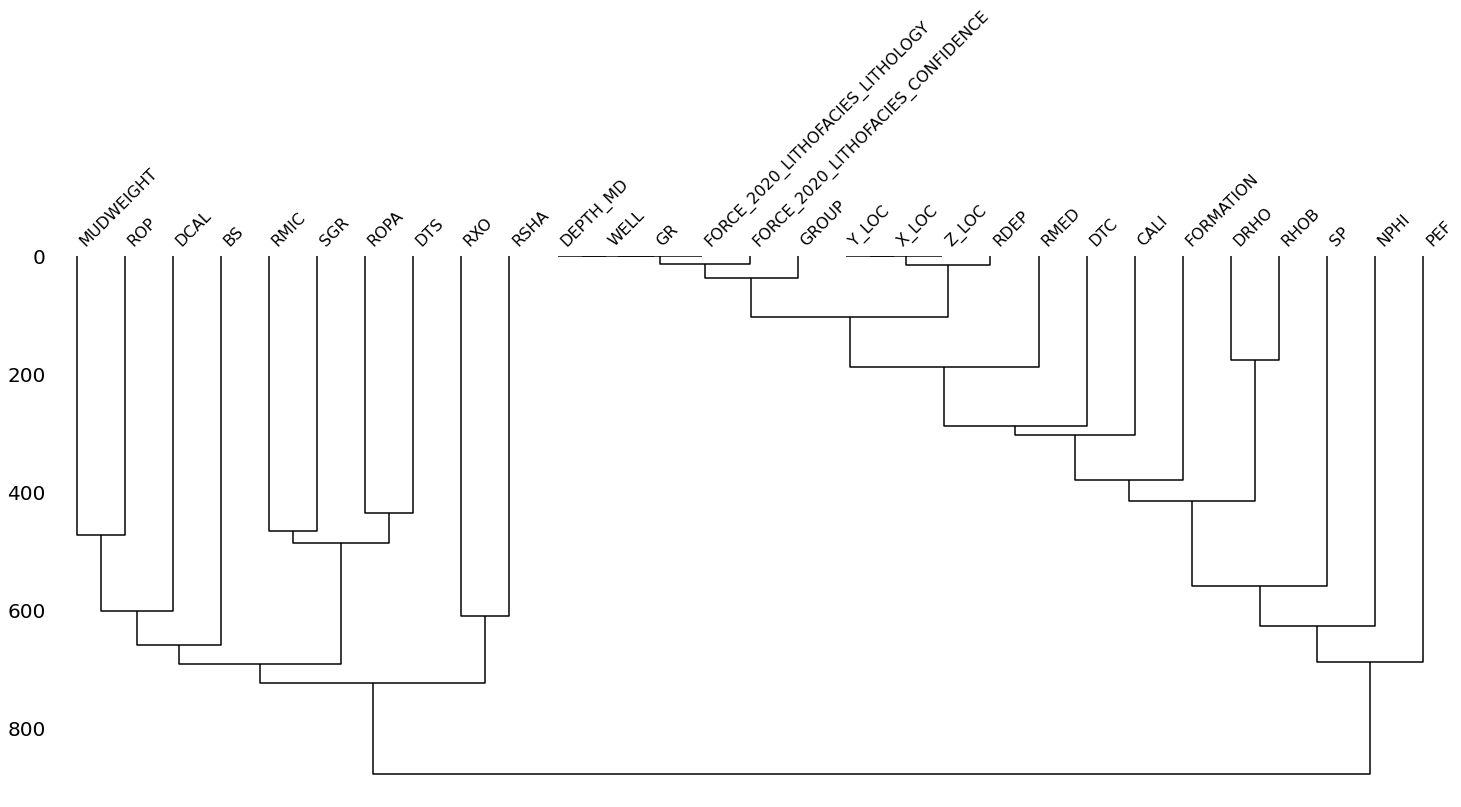

In [18]:
msno.dendrogram(train)

# null values distribution

In [19]:
measures_list = train.columns.values[7:-2]
nan = train[measures_list].isna().mean().sort_values()
nan

GR           0.000000
RDEP         0.009410
RMED         0.033313
DTC          0.069084
CALI         0.075076
RHOB         0.137777
DRHO         0.156046
SP           0.261650
NPHI         0.346090
BS           0.416787
PEF          0.426155
RSHA         0.461218
ROP          0.542874
RXO          0.720270
MUDWEIGHT    0.729903
DCAL         0.744699
ROPA         0.835691
RMIC         0.849502
DTS          0.850823
SGR          0.940750
dtype: float64

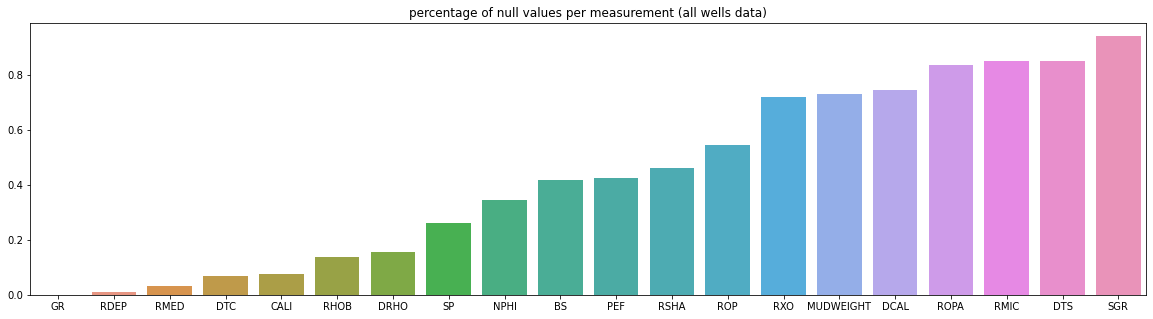

In [20]:
plt.figure(figsize=(20,5))
splot = sns.barplot(x=nan.index,y=nan)
splot.set_title("percentage of null values per measurement (all wells data)")
plt.show()

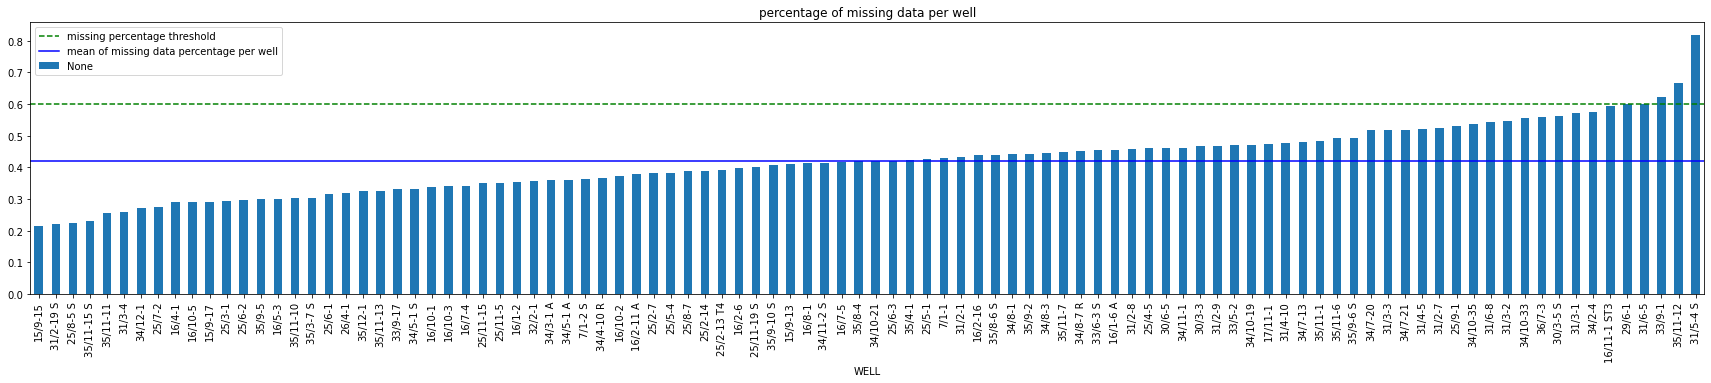

In [21]:
nan_values_per_well = train.isna()[measures_list]
nan_values_per_well["WELL"] = train.WELL
nan_values_per_well= nan_values_per_well.groupby("WELL").mean()
##order wells per missing values count overall
missing_data_threshold = 0.6
wells_missing_data = nan_values_per_well.mean(axis=1).sort_values()
wells_missing_data.plot(kind="bar",figsize=(30,5))
plt.axhline(y=missing_data_threshold, color='green', linestyle='--',label="missing percentage threshold")
plt.axhline(y=wells_missing_data.mean(), color='blue', linestyle='-',label="mean of missing data percentage per well")
plt.title("percentage of missing data per well")
plt.legend()
plt.show()

In [22]:
wells_missing_data[wells_missing_data>0.5]

WELL
34/7-20        0.517994
31/3-3         0.518303
34/7-21        0.519305
31/4-5         0.521012
31/2-7         0.525094
25/9-1         0.530642
34/10-35       0.535666
31/6-8         0.543978
31/3-2         0.547474
34/10-33       0.554904
36/7-3         0.559496
30/3-5 S       0.560942
31/3-1         0.571309
34/2-4         0.573657
16/11-1 ST3    0.594725
29/6-1         0.599107
31/6-5         0.600725
33/9-1         0.622905
35/11-12       0.668109
31/5-4 S       0.817138
dtype: float64

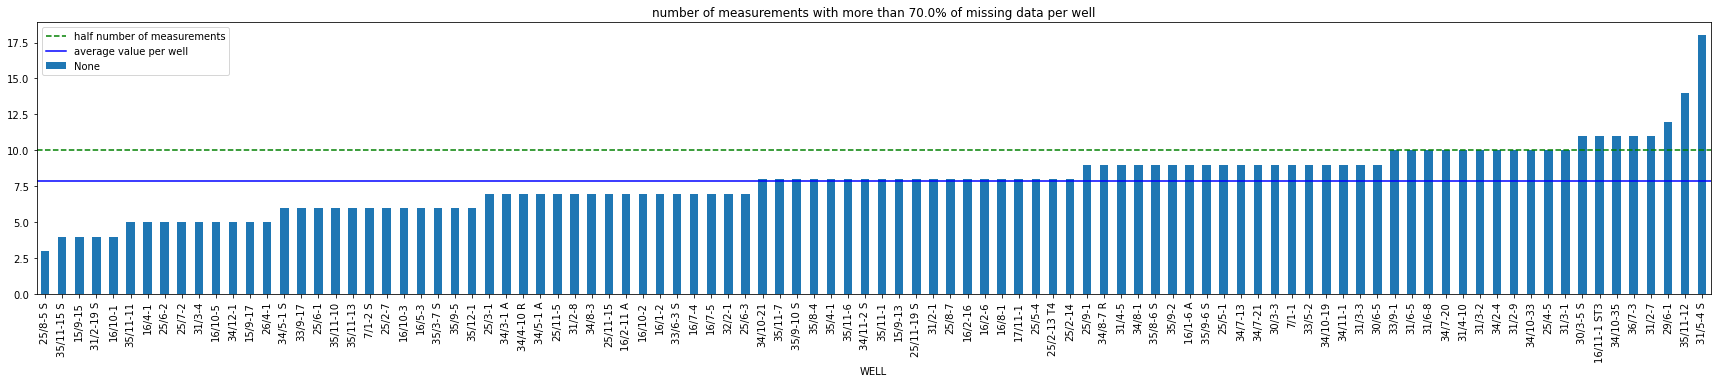

In [23]:
feature_missing_data_threshold = 0.70

wells_missing_data2 = (nan_values_per_well>feature_missing_data_threshold).sum(axis=1).sort_values()
wells_missing_data2.plot(kind="bar",figsize=(30,5))
plt.axhline(y=nan_values_per_well.shape[1]//2, color='green', linestyle='--',label="half number of measurements")
plt.axhline(y=wells_missing_data2.mean(), color='blue', linestyle='-',label="average value per well")
plt.title("number of measurements with more than {}% of missing data per well".format(feature_missing_data_threshold*100))

plt.legend()
plt.show()

In [24]:
wells_missing_data2[wells_missing_data2>=10]

WELL
33/9-1         10
31/6-5         10
31/6-8         10
34/7-20        10
31/4-10        10
31/3-2         10
34/2-4         10
31/2-9         10
34/10-33       10
25/4-5         10
31/3-1         10
30/3-5 S       11
16/11-1 ST3    11
34/10-35       11
36/7-3         11
31/2-7         11
29/6-1         12
35/11-12       14
31/5-4 S       18
dtype: int64

Observations
GR has no missing value
ROPA,RMIC,DTS,SGR have more than 80% of missing values (remove them from data?keep them?)
According to the boxplots, There are some features we could put aside because they have a very high level of null values percentage for almost all wells (more than 75% of wells): SGR, DTS, DCAL,RMIC, RXO. MUDWEIGHT also have more than 40% empty values for 75% of wells.
outliers (wells)

there are 4 wells with more than 60% of missing data (31/6-5 ,33/9-1,35/11-12,31/5-4 S).

Well 31/5-4 S has 81% of missing data. We can put them aside during modelling.

Depending on the results we can also try to remove other wells with more than 50% of missing values (average missing values percentage is 41%).

There are 4 wells with 10+/20 features which have more than 90% of missing values : (well,number) 34/10-33 10, 34/7-20 10, 30/3-5 S 11, 36/7-3 11
There are 16 wells with 10+/20 features which have more than 75% of missing values : (well,number) 31/6-8 10 31/2-9 10 34/2-4 10 31/3-2 10 31/6-5 10 34/10-33 10 33/9-1 10 34/7-20 10 36/7-3 11 16/11-1 ST3 11 30/3-5 S 11 34/10-35 11 31/2-7 11 29/6-1 12 35/11-12 14 31/5-4 S 18
We can remove those wells or impute missing values during modelisation

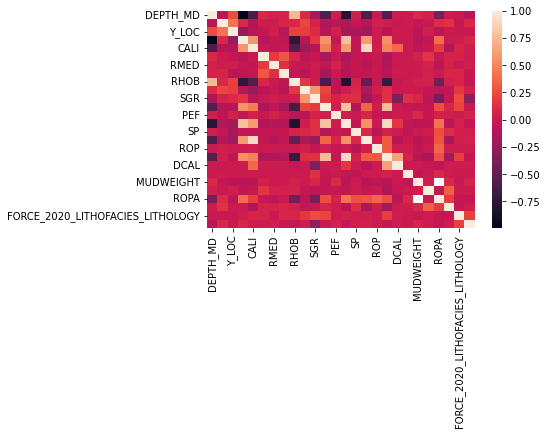

In [25]:
corr = train.corr()
round(corr,2)
sns.heatmap(corr);

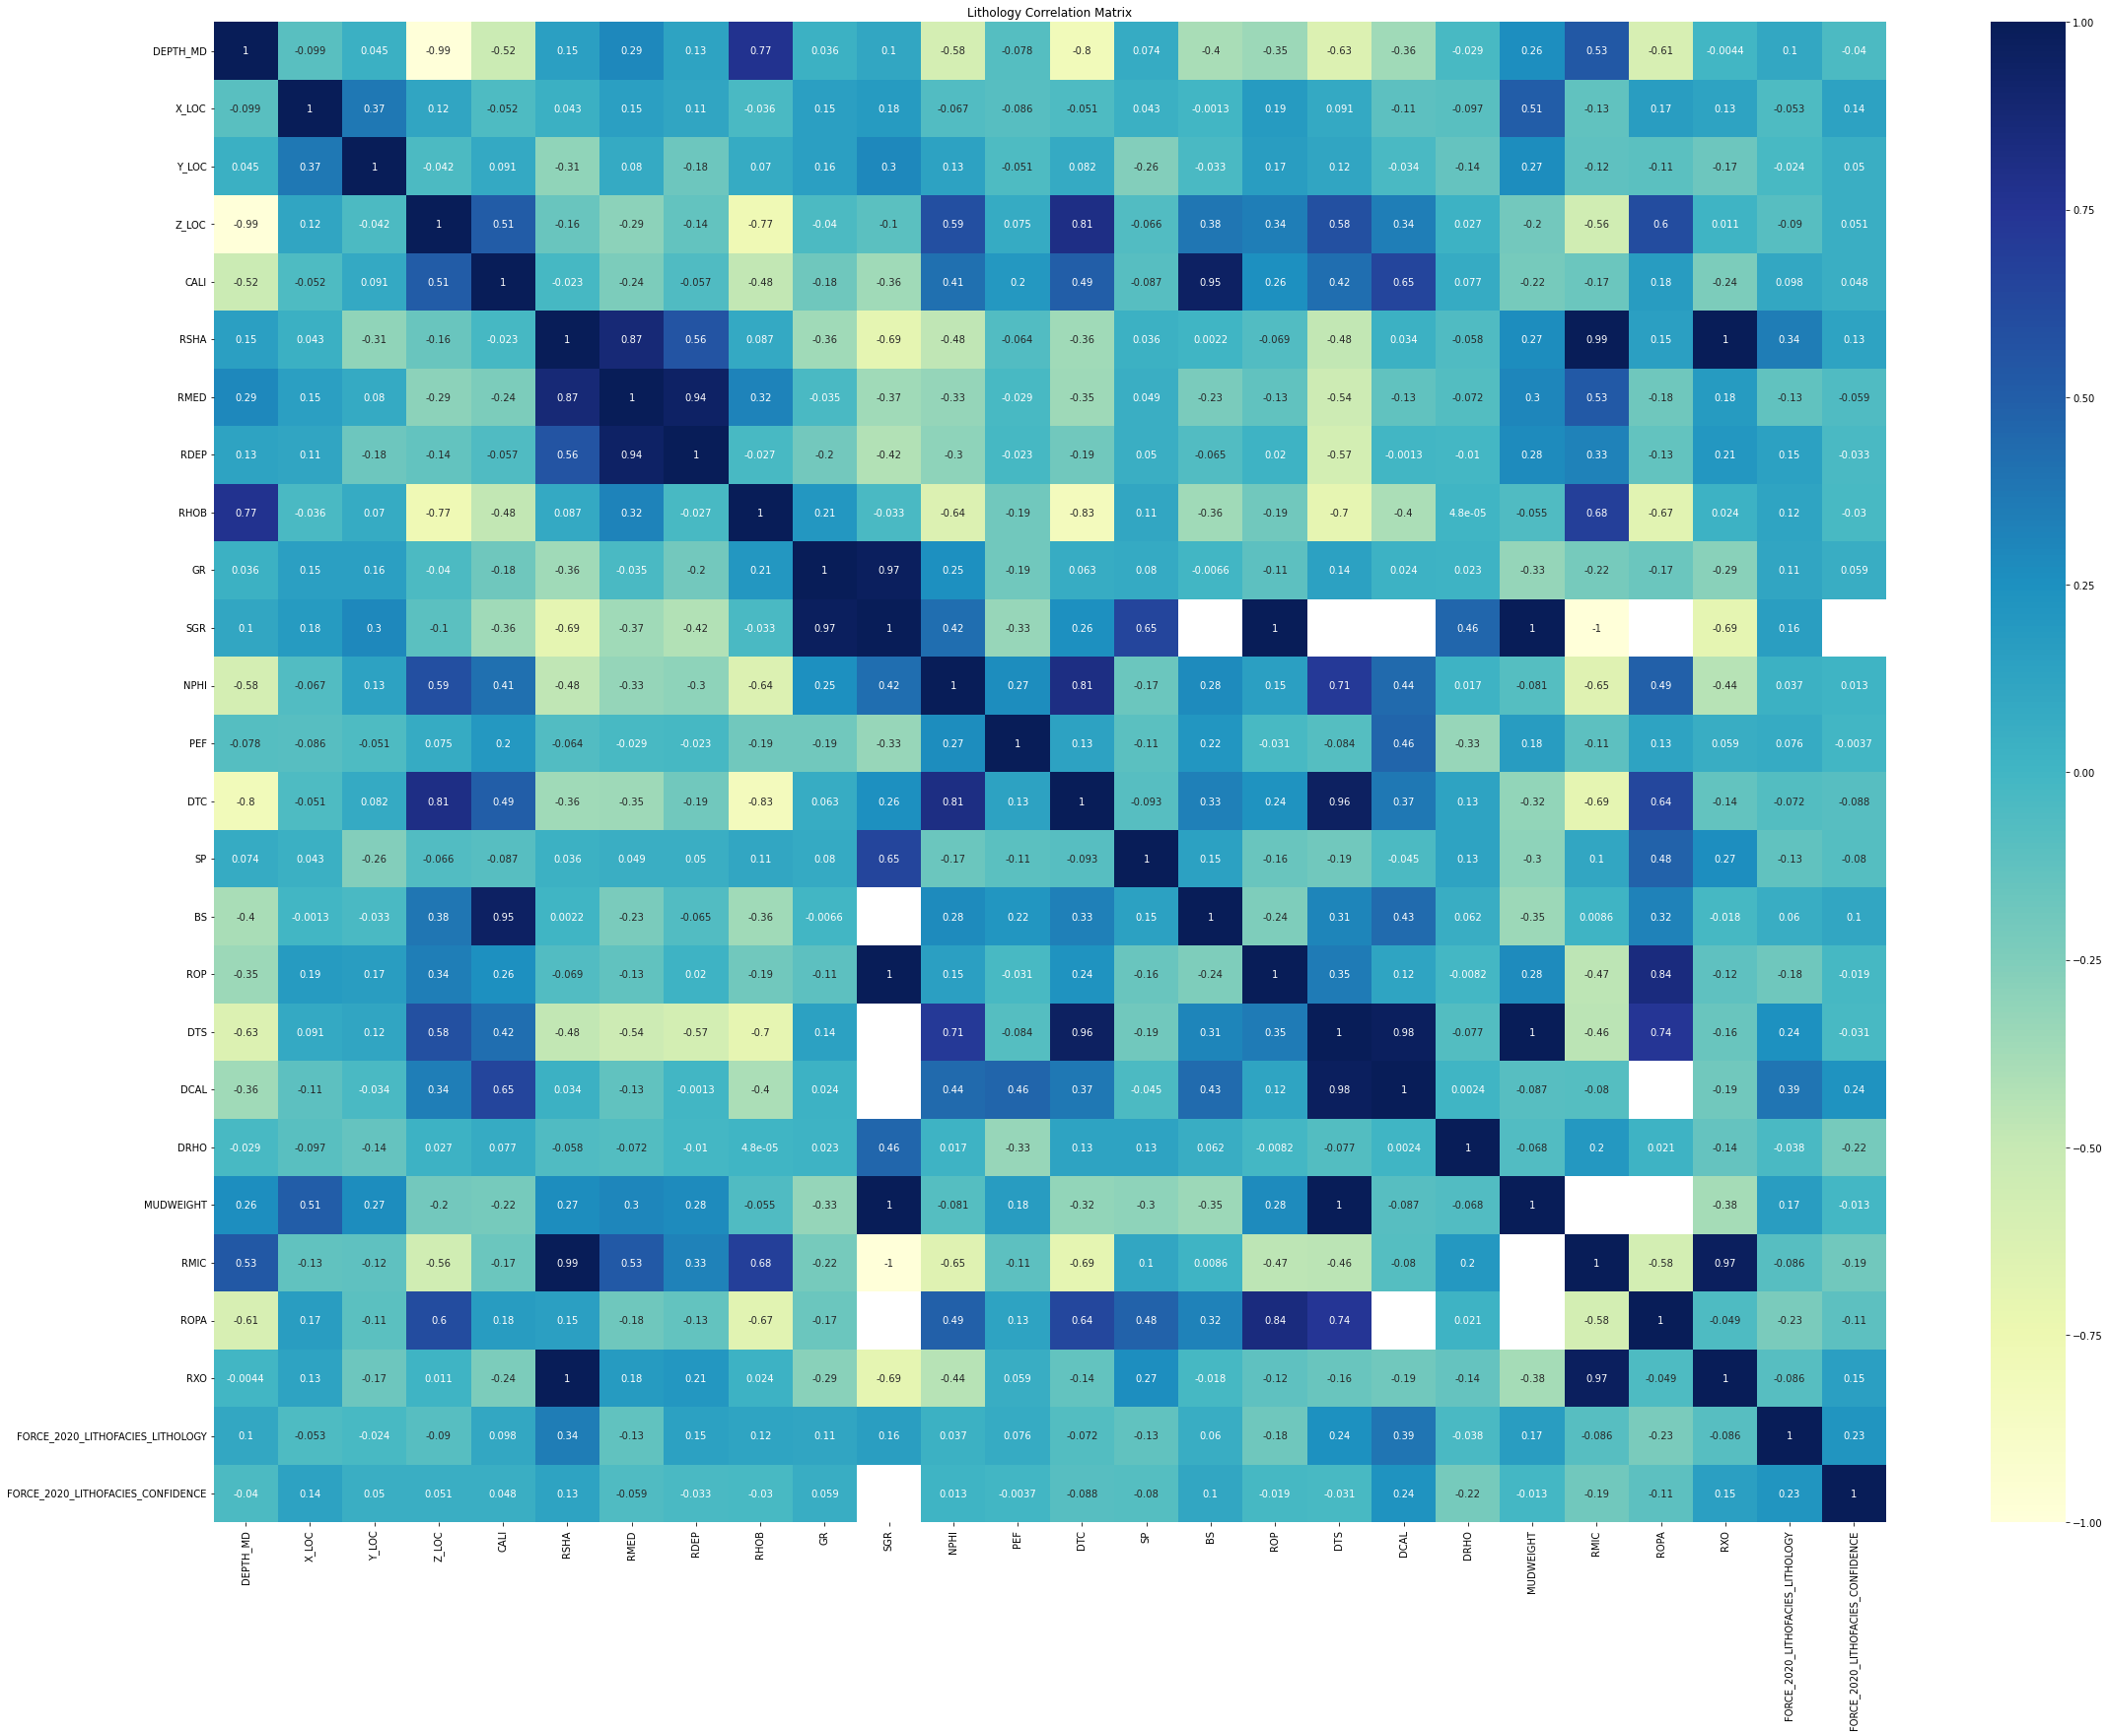

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(38, 28))
sns.heatmap(train.sample(200).corr(), cmap='YlGnBu', annot=True)
plt.title('Lithology Correlation Matrix');

# DATA VISUALISATION



In [27]:
import plotly.express as px
px.bar(train.sample(1000), 
           title='Lithology vs. Confidence',
           x='FORMATION',
           y='FORCE_2020_LITHOFACIES_LITHOLOGY',
           log_y=True,
#            log_x=True,
           color='RSHA')

In [28]:
fig = px.histogram(train.sample(1000), 
                   x='SP', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of SP')
fig.update_layout(bargap=0.1)
fig.show()

In [29]:
fig = px.histogram(train.sample(1000), 
                   x='GR', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of GR')
fig.update_layout(bargap=0.1)
fig.show()

In [30]:
fig = px.histogram(train.sample(1000), 
                   x='RHOB', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of RHOB')
fig.update_layout(bargap=0.1)
fig.show()

In [31]:
fig = px.histogram(train.sample(1000), 
                   x='DTC', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of DTC')
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.histogram(train.sample(1000), 
                   x='ROP', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of ROP')
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
 fig = px.histogram(train.sample(1000), 
                   x='NPHI', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Neutron porosity',
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
train['FORCE_2020_LITHOFACIES_LITHOLOGY'].nunique()

12

In [35]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
train['Lithology'] = train['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)

In [36]:
train

WELL   DEPTH_MD         X_LOC      Y_LOC       Z_LOC  \
0        15/9-13   494.5280  437641.96875  6470972.5 -469.501831   
1        15/9-13   494.6800  437641.96875  6470972.5 -469.653809   
2        15/9-13   494.8320  437641.96875  6470972.5 -469.805786   
3        15/9-13   494.9840  437641.96875  6470972.5 -469.957794   
4        15/9-13   495.1360  437641.96875  6470972.5 -470.109772   
...          ...        ...           ...        ...         ...   
1170506  7/1-2 S  3169.3124           NaN        NaN         NaN   
1170507  7/1-2 S  3169.4644           NaN        NaN         NaN   
1170508  7/1-2 S  3169.6164           NaN        NaN         NaN   
1170509  7/1-2 S  3169.7684           NaN        NaN         NaN   
1170510  7/1-2 S  3169.9204           NaN        NaN         NaN   

                GROUP  FORMATION       CALI  RSHA      RMED  ...  DTS  DCAL  \
0        NORDLAND GP.        NaN  19.480835   NaN  1.611410  ...  NaN   NaN   
1        NORDLAND GP.        NaN  19.468800   NaN  1.618070  ...  NaN   NaN   
2        NORDLAND GP.        NaN  19.468800   NaN  1.626459  ...  NaN   NaN   
3        NORDLAND GP.        NaN  19.459282   NaN  1.621594  ...  NaN   NaN   
4        NORDLAND GP.        NaN  19.453100   NaN  1.602679  ...  NaN   NaN   
...               ...        ...        ...   ...       ...  ...  ...   ...   
1170506  VESTLAND GP.  Bryne Fm.   8.423170   NaN       NaN  ...  NaN   NaN   
1170507  VESTLAND GP.  Bryne Fm.   8.379244   NaN       NaN  ...  NaN   NaN   
1170508  VESTLAND GP.  Bryne Fm.   8.350248   NaN       NaN  ...  NaN   NaN   
1170509  VESTLAND GP.  Bryne Fm.   8.313779   NaN       NaN  ...  NaN   NaN   
1170510  VESTLAND GP.  Bryne Fm.   8.294910   NaN       NaN  ...  NaN   NaN   

             DRHO  MUDWEIGHT  RMIC       ROPA  RXO  \
0       -0.574928        NaN   NaN        NaN  NaN   
1       -0.570188        NaN   NaN        NaN  NaN   
2       -0.574245        NaN   NaN        NaN  NaN   
3       -0.586315        NaN   NaN        NaN  NaN   
4       -0.597914        NaN   NaN        NaN  NaN   
...           ...        ...   ...        ...  ...   
1170506 -0.001763        NaN   NaN  26.673708  NaN   
1170507 -0.007600        NaN   NaN  26.840818  NaN   
1170508 -0.018297        NaN   NaN  27.007942  NaN   
1170509 -0.011438        NaN   NaN  27.175179  NaN   
1170510 -0.011398        NaN   NaN  27.342442  NaN   

         FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  \
0                                   65000                                1.0   
1                                   65000                                1.0   
2                                   65000                                1.0   
3                                   65000                                1.0   
4                                   65000                                1.0   
...                                   ...                                ...   
1170506                             30000                                2.0   
1170507                             65030                                2.0   
1170508                             65030                                2.0   
1170509                             65030                                2.0   
1170510                             65030                                2.0   

               Lithology  
0                  Shale  
1                  Shale  
2                  Shale  
3                  Shale  
4                  Shale  
...                  ...  
1170506        Sandstone  
1170507  Sandstone/Shale  
1170508  Sandstone/Shale  
1170509  Sandstone/Shale  
1170510  Sandstone/Shale  

[1170511 rows x 30 columns]

# Density - Neutron Distribution by Lithology

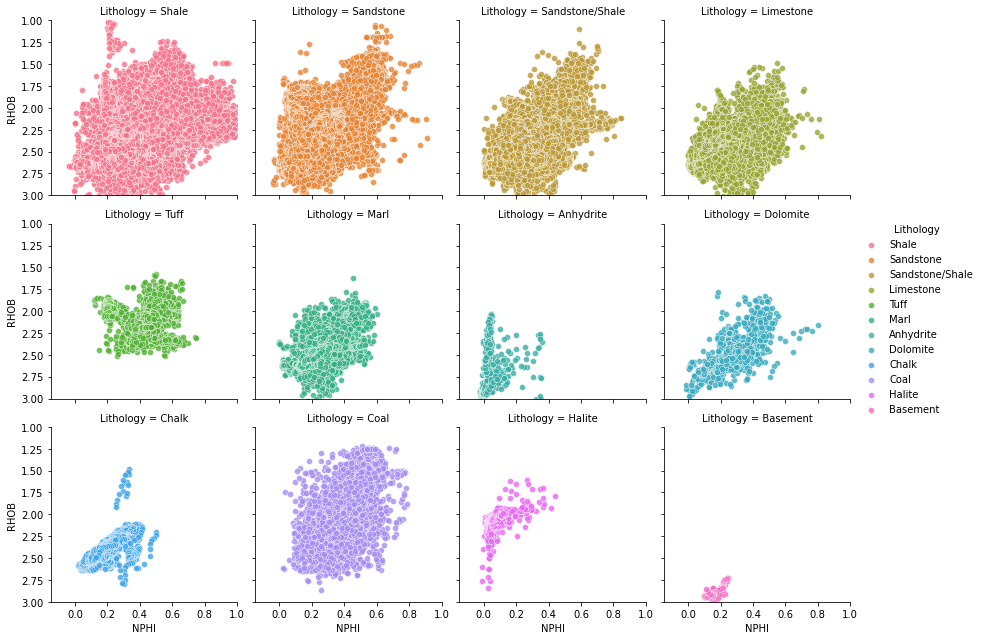

In [37]:
plot_dn = sns.FacetGrid(train, col='Lithology', col_wrap=4, hue='Lithology')
plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8)
plot_dn.set(xlim=(-0.15, 1))
plot_dn.set(ylim=(3, 1))
plot_dn.add_legend();

# Density - Neutron Distribution by Lithology and Well
We can further enhance the density neutron data by looking at the lithology distribution across multiple wells. Using the converted LITH data column we can create shading for different lithology types by supplying LITH to the hue parameter. We can then supply the WELL column from the dataframe into the col parameter.

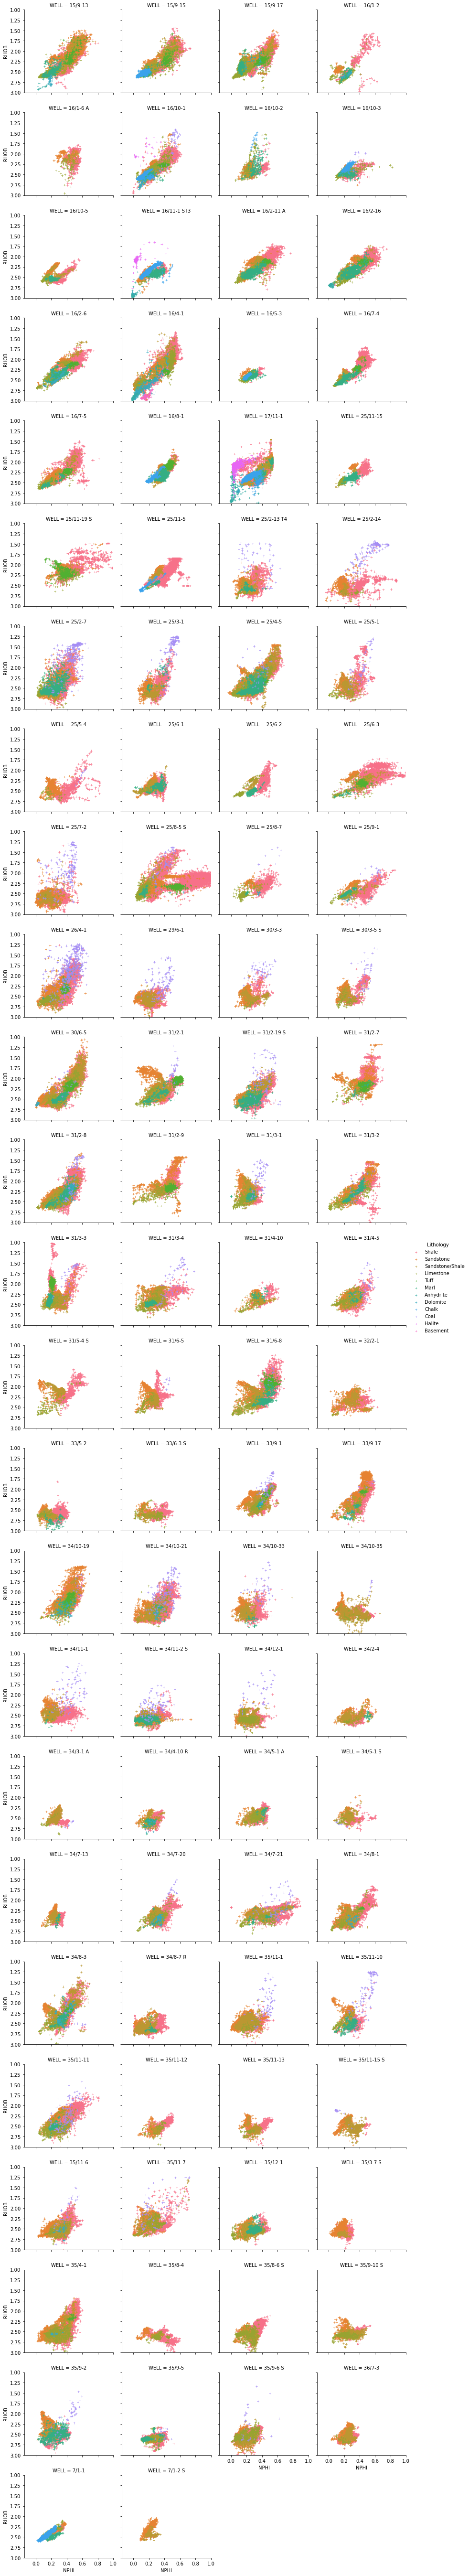

In [38]:
plot_dn = sns.FacetGrid(train, col='WELL', col_wrap=4, hue='Lithology')
plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8,linewidth=1, size=0.1, marker='+')
plot_dn.set(xlim=(-0.15, 1))
plot_dn.set(ylim=(3, 1))
plot_dn.add_legend();

# Density - Neutron Distribution by Lithology and Geological Group

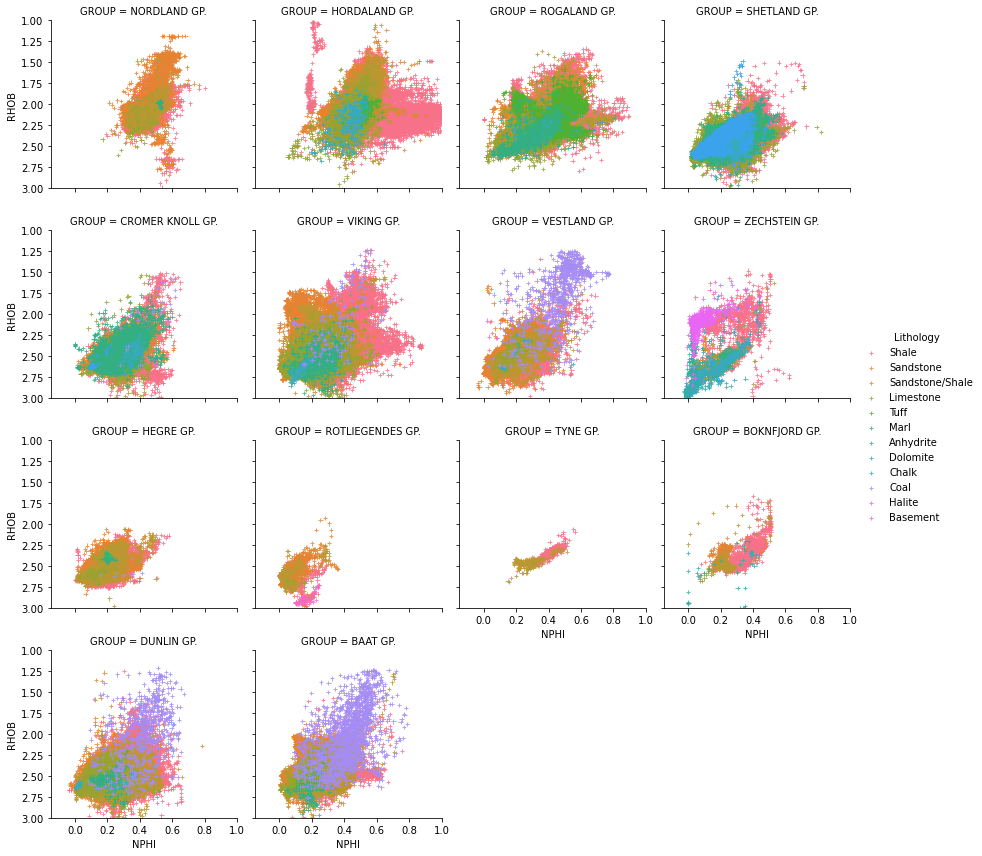

In [39]:
plot_dn = sns.FacetGrid(train, col='GROUP', col_wrap=4, hue='Lithology')
plot_dn.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.8,linewidth=1, size=0.1, marker='+')
plot_dn.set(xlim=(-0.15, 1))
plot_dn.set(ylim=(3, 1))
plot_dn.add_legend();

# Displaying the logs

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16448/2563653784.py:26: MatplotlibDeprecationWarning:

Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.



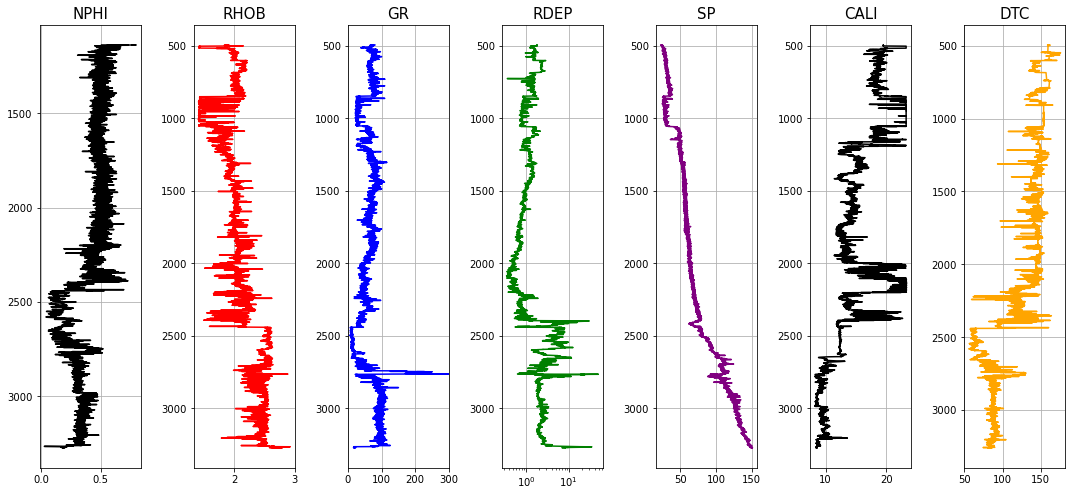

In [40]:
# Display train well data
well = train[train.WELL=='15/9-13']

# define what logs are we going to us
logs = ['NPHI', 'RHOB', 'GR', 'RDEP', 'SP', 'CALI', 'DTC']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(15,7))

# Color list
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH_MD'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH_MD'], color=colors[i])
  
  ax[i].set_title(logs[i], size=15)
  ax[i].invert_yaxis()
  ax[i].grid(True)

ax[2].set_xlim(0, 300)
plt.tight_layout(1.1)
plt.show()

# Identifying Bad Hole Data
To visualise where we have badhole data caused by borehole enlargement. Deterioration of the borehole wall can happen for a number of different reasons including undercompacted rocks and variations in stresses acting on those rocks such as the mud weight.

In [41]:
train_BS = train.dropna(subset=['BS', 'CALI']).copy()
train_BS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657745 entries, 18350 to 1170510
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               657745 non-null  object 
 1   DEPTH_MD                           657745 non-null  float64
 2   X_LOC                              649822 non-null  float64
 3   Y_LOC                              649822 non-null  float64
 4   Z_LOC                              649822 non-null  float64
 5   GROUP                              657745 non-null  object 
 6   FORMATION                          600992 non-null  object 
 7   CALI                               657745 non-null  float64
 8   RSHA                               375101 non-null  float64
 9   RMED                               641156 non-null  float64
 10  RDEP                               649659 non-null  float64
 11  RHOB                              

In [42]:
train_BS['BS'].isna().sum()

0

In [43]:
train_BS['CALI'].isna().sum()

0

In [44]:
numer_of_BS_wells = train_BS['WELL'].nunique()
print(f"We have {numer_of_BS_wells} wells that have bit size log")

We have 68 wells that have bit size log


In [45]:
wells_BS = train_BS['WELL'].unique()
wells_BS

array(['15/9-15', '16/1-2', '16/1-6 A', '16/10-1', '16/10-2', '16/10-3',
       '16/10-5', '16/11-1 ST3', '16/2-11 A', '16/2-16', '16/2-6',
       '16/4-1', '16/5-3', '16/7-4', '25/11-15', '25/11-5', '25/2-13 T4',
       '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-4', '25/6-1',
       '25/6-2', '25/6-3', '25/7-2', '25/8-5 S', '25/8-7', '25/9-1',
       '26/4-1', '31/2-1', '31/2-19 S', '31/3-1', '31/3-2', '31/3-3',
       '31/3-4', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-33', '34/11-1', '34/12-1', '34/3-1 A',
       '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13', '34/8-1',
       '34/8-7 R', '35/11-10', '35/11-11', '35/11-12', '35/11-13',
       '35/11-15 S', '35/11-7', '35/12-1', '35/3-7 S', '35/4-1',
       '35/8-6 S', '35/9-10 S', '35/9-2', '35/9-5', '7/1-1', '7/1-2 S'],
      dtype=object)

We need to calculate the difference between the bit size and the calliper logs to analyse the well conditions. If the result is a negative value, this indicates that the borehole has shrunken in size resulting from shale swelling. On the other hand, a positive value indicates that the borehole has increased in size due to caving resulting from a fragile formation.

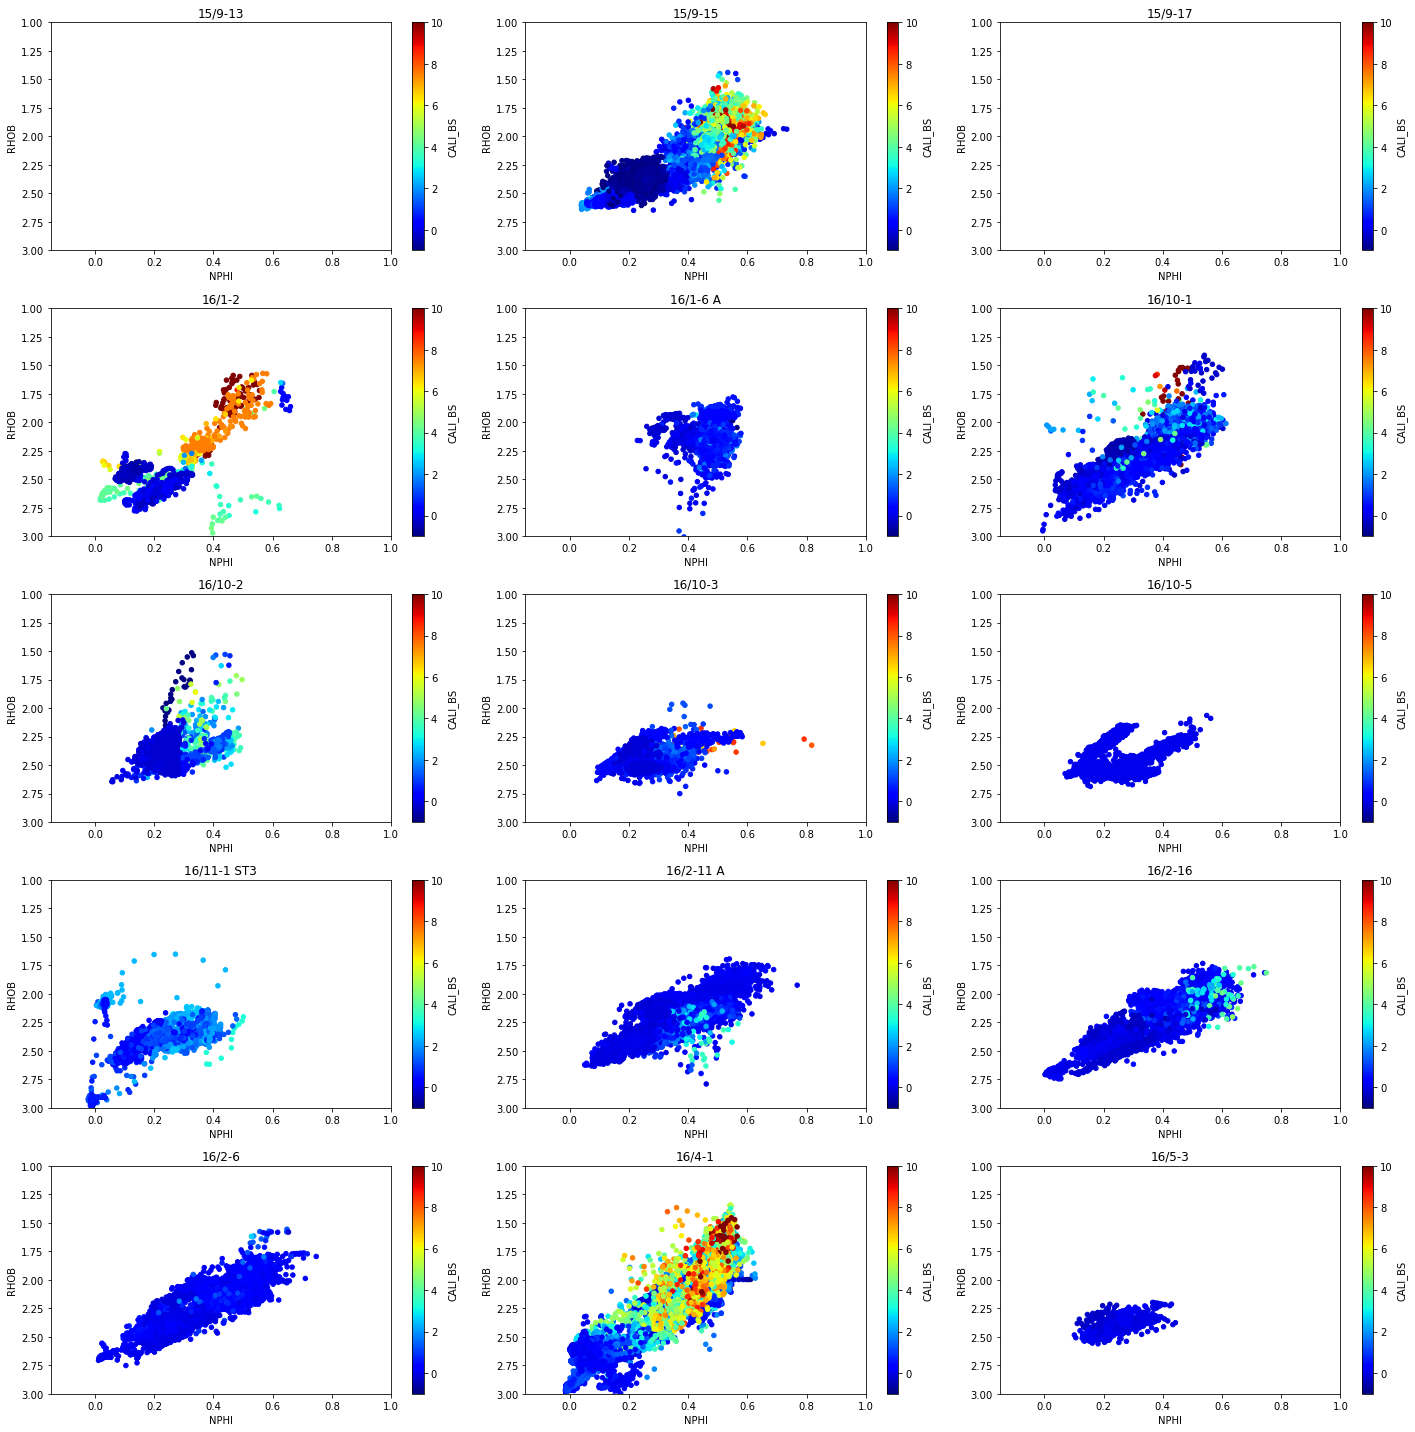

In [46]:
train['CALI_BS'] = train['CALI'] - train['BS']
well_group = train.groupby('WELL')
fig, axs = plt.subplots(5, 3, figsize=(20,20))
for (name, df), ax in zip(well_group, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='CALI_BS', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

well 15/9–15 and 16/1–2 and 16/4-1 have badhole data

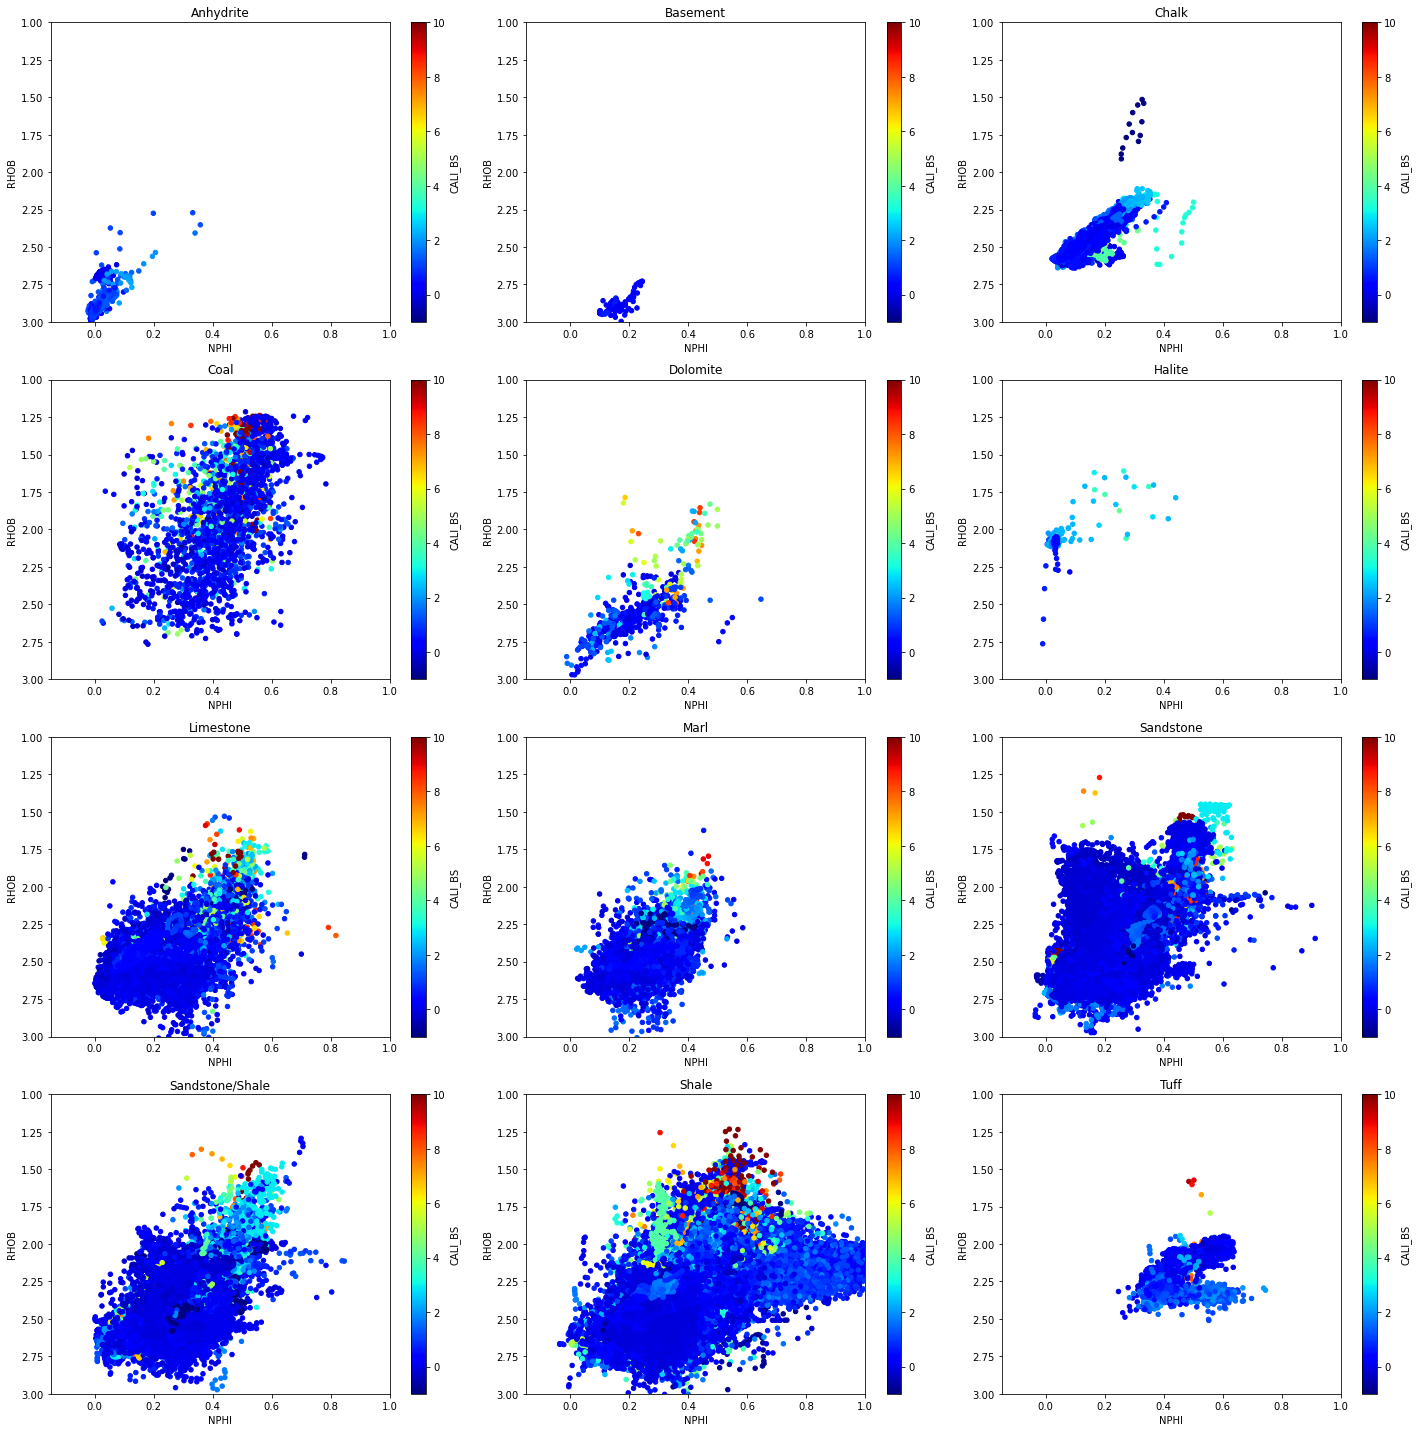

In [47]:
well_group_lith = train.groupby('Lithology')
fig, axs = plt.subplots(4, 3, figsize=(20,20))
for (name, df), ax in zip(well_group_lith, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='CALI_BS', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 31 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [49]:
train1= train.copy()
test1=test.copy()
hidden1=hidden.copy()

In [50]:
def outlier_removal(df, op, limit, replace):
    temp_name = df.name
    print('Before outlier removal for',df.name)
    print(df.name,'Min',min(df[df.notnull()]))
    print(df.name,'Max',max(df[df.notnull()]))
    outliers = [x for x in df if op(x,limit)]
    print('Number of',df.name,'outliers:',len(outliers),'\n')
    
    df = np.where((op(df,limit)), replace, df)
    df = pd.Series(df)
    print('After outlier removal for',temp_name)
    print(temp_name,'Min',min(df[df.notnull()]))
    print(temp_name,'Max',max(df[df.notnull()]))
    
    return df

In [51]:
df

WELL   DEPTH_MD         X_LOC      Y_LOC        Z_LOC  \
11205    15/9-13  2198.2960  437622.28125  6470981.0 -2172.966553   
11206    15/9-13  2198.4480  437622.28125  6470981.0 -2173.118652   
11207    15/9-13  2198.6000  437622.28125  6470981.0 -2173.270752   
11208    15/9-13  2198.7520  437622.28125  6470981.0 -2173.422607   
11209    15/9-13  2198.9040  437622.28125  6470981.0 -2173.574707   
...          ...        ...           ...        ...          ...   
1163826    7/1-1  2096.9048  450384.03125  6406642.0 -2062.797607   
1163827    7/1-1  2097.0568  450384.03125  6406642.0 -2062.949707   
1163833    7/1-1  2097.9688  450384.03125  6406642.0 -2063.861572   
1163834    7/1-1  2098.1208  450384.03125  6406642.0 -2064.013672   
1163835    7/1-1  2098.2728  450384.03125  6406642.0 -2064.165527   

                GROUP   FORMATION       CALI      RSHA      RMED  ...  \
11205    ROGALAND GP.  Balder Fm.  23.249596       NaN  0.474248  ...   
11206    ROGALAND GP.  Balder Fm.  23.312500       NaN  0.479000  ...   
11207    ROGALAND GP.  Balder Fm.  23.312500       NaN  0.476230  ...   
11208    ROGALAND GP.  Balder Fm.  23.312500       NaN  0.464028  ...   
11209    ROGALAND GP.  Balder Fm.  23.304829       NaN  0.461959  ...   
...               ...         ...        ...       ...       ...  ...   
1163826  ROGALAND GP.  Balder Fm.  12.982719  0.734350  0.717166  ...   
1163827  ROGALAND GP.  Balder Fm.  12.984481  0.776998  0.763764  ...   
1163833  ROGALAND GP.  Balder Fm.  12.965786  0.968282  0.997294  ...   
1163834  ROGALAND GP.    Sele Fm.  12.959188  0.898155  0.862216  ...   
1163835  ROGALAND GP.    Sele Fm.  12.950507  0.803849  0.755664  ...   

             DCAL      DRHO  MUDWEIGHT  RMIC  ROPA  RXO  \
11205         NaN  0.008800   0.136602   NaN   NaN  NaN   
11206         NaN  0.011396   0.136602   NaN   NaN  NaN   
11207         NaN  0.025355   0.136602   NaN   NaN  NaN   
11208         NaN  0.035775   0.136602   NaN   NaN  NaN   
11209         NaN  0.023178   0.136602   NaN   NaN  NaN   
...           ...       ...        ...   ...   ...  ...   
1163826  0.732720       NaN   1.449899   NaN   NaN  NaN   
1163827  0.734481       NaN   1.449899   NaN   NaN  NaN   
1163833  0.715786       NaN   1.449899   NaN   NaN  NaN   
1163834  0.709188       NaN   1.449899   NaN   NaN  NaN   
1163835  0.700508       NaN   1.449899   NaN   NaN  NaN   

         FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  \
11205                               99000                                3.0   
11206                               99000                                3.0   
11207                               99000                                3.0   
11208                               99000                                3.0   
11209                               99000                                3.0   
...                                   ...                                ...   
1163826                             99000                                3.0   
1163827                             99000                                3.0   
1163833                             99000                                3.0   
1163834                             99000                                3.0   
1163835                             99000                                3.0   

         Lithology   CALI_BS  
11205         Tuff       NaN  
11206         Tuff       NaN  
11207         Tuff       NaN  
11208         Tuff       NaN  
11209         Tuff       NaN  
...            ...       ...  
1163826       Tuff  0.732718  
1163827       Tuff  0.734480  
1163833       Tuff  0.715785  
1163834       Tuff  0.709187  
1163835       Tuff  0.700506  

[15245 rows x 31 columns]

In [52]:
import operator
train1['RMED'] = outlier_removal(train1['RMED'], operator.le, 0, np.nan)

Before outlier removal for RMED
RMED Min -0.008418695
RMED Max 1988.616333
Number of RMED outliers: 7 

After outlier removal for RMED
RMED Min 0.0399037674
RMED Max 1988.616333


In [53]:
train1['GR'] = outlier_removal(train1['GR'], operator.gt, 200, 200)

Before outlier removal for GR
GR Min 0.1092843339
GR Max 1076.9638672
Number of GR outliers: 6427 

After outlier removal for GR
GR Min 0.1092843339
GR Max 200.0


In [54]:
train1['RSHA'] = outlier_removal(train1['RSHA'], operator.gt, 2000, 2000)

Before outlier removal for RSHA
RSHA Min 0.0001
RSHA Max 2193.904541
Number of RSHA outliers: 69 

After outlier removal for RSHA
RSHA Min 0.0001
RSHA Max 2000.0


In [55]:
train1['ROP'] = outlier_removal(train1['ROP'], operator.le, 0, np.nan)

Before outlier removal for ROP
ROP Min -0.117977008
ROP Max 47015.125
Number of ROP outliers: 65 

After outlier removal for ROP
ROP Min 0.0023031915
ROP Max 47015.125


In [56]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 31 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131511 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 31 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

Text(0.5, 1.0, 'Before outlier removal')

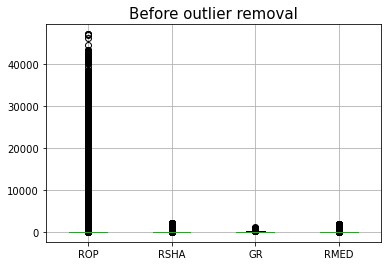

In [58]:
box_features=['ROP','RSHA','GR','RMED']

train[box_features].boxplot()
plt.title('Before outlier removal', size=15)

# Handling missing values
Most frequently used approaches to handle the missing data are:

Do nothing
Drop entire row
Fill with the mean or median value of the measurement for entire well section
Fill with the previous or the next value to missing entry
Interpolate between the neighbouring values(value just before and after the missing entry)
Impute using k-NN..................

# Preprocessing
cleaning data and removing unneccessary column

In [59]:
# storing length of datasets 
train_len = train.shape[0] 
test_len = test.shape[0]
All_data = pd.concat((train,test,hidden)).reset_index(drop=True) 
#dropping columns with high missing values
drop_cols = ['SGR', 'ROPA', 'RXO', 'MUDWEIGHT','DCAL','RMIC','FORCE_2020_LITHOFACIES_CONFIDENCE','CALI_BS']
All_data_drop = All_data.drop(drop_cols, axis=1)
# encoding categorical variables
All_data_drop['GROUP_encoded'] = All_data_drop['GROUP'].astype('category')
All_data_drop['GROUP_encoded'] = All_data_drop['GROUP_encoded'].cat.codes

All_data_drop['FORMATION_encoded'] = All_data_drop['FORMATION'].astype('category')
All_data_drop['FORMATION_encoded'] = All_data_drop['FORMATION_encoded'].cat.codes

All_data_drop['WELL_encoded'] = All_data_drop['WELL'].astype('category')
All_data_drop['WELL_encoded'] = All_data_drop['WELL_encoded'].cat.codes

All_data_drop['Lithology_encoded'] = All_data_drop['FORCE_2020_LITHOFACIES_LITHOLOGY'].astype('category')
All_data_drop['Lithology_encoded'] = All_data_drop['Lithology_encoded'].cat.codes

In [60]:
#dropping categorial features replaces beforehan by encoded features
drop2 = All_data_drop.drop(['GROUP', 'FORMATION','WELL','FORCE_2020_LITHOFACIES_LITHOLOGY','Lithology'], axis=1)

# splitting dataset into training, test, and hidden sets
train_prep = drop2[:train_len].copy()
test_prep = drop2[train_len:(train_len+test_len)].copy()
hidden_prep = drop2[(train_len+test_len):].copy()

In [61]:
train_prep1= train_prep.copy()
test_prep1= test_prep.copy()
hidden_prep1= hidden_prep.copy()

In [62]:
train_prep1

DEPTH_MD         X_LOC      Y_LOC       Z_LOC       CALI  RSHA  \
0         494.5280  437641.96875  6470972.5 -469.501831  19.480835   NaN   
1         494.6800  437641.96875  6470972.5 -469.653809  19.468800   NaN   
2         494.8320  437641.96875  6470972.5 -469.805786  19.468800   NaN   
3         494.9840  437641.96875  6470972.5 -469.957794  19.459282   NaN   
4         495.1360  437641.96875  6470972.5 -470.109772  19.453100   NaN   
...            ...           ...        ...         ...        ...   ...   
1170506  3169.3124           NaN        NaN         NaN   8.423170   NaN   
1170507  3169.4644           NaN        NaN         NaN   8.379244   NaN   
1170508  3169.6164           NaN        NaN         NaN   8.350248   NaN   
1170509  3169.7684           NaN        NaN         NaN   8.313779   NaN   
1170510  3169.9204           NaN        NaN         NaN   8.294910   NaN   

             RMED      RDEP      RHOB         GR  ...         DTC         SP  \
0        1.611410  1.798681  1.884186  80.200851  ...  161.131180  24.612379   
1        1.618070  1.795641  1.889794  79.262886  ...  160.603470  23.895531   
2        1.626459  1.800733  1.896523  74.821999  ...  160.173615  23.916357   
3        1.621594  1.801517  1.891913  72.878922  ...  160.149429  23.793688   
4        1.602679  1.795299  1.880034  71.729141  ...  160.128342  24.104078   
...           ...       ...       ...        ...  ...         ...        ...   
1170506       NaN       NaN  2.527984  77.654900  ...         NaN        NaN   
1170507       NaN       NaN  2.537613  75.363937  ...         NaN        NaN   
1170508       NaN       NaN  2.491860  66.452843  ...         NaN        NaN   
1170509       NaN       NaN  2.447539  55.784817  ...         NaN        NaN   
1170510       NaN       NaN  2.430716  48.432129  ...         NaN        NaN   

          BS        ROP  DTS      DRHO  GROUP_encoded  FORMATION_encoded  \
0        NaN  34.636410  NaN -0.574928              6                 -1   
1        NaN  34.636410  NaN -0.570188              6                 -1   
2        NaN  34.779556  NaN -0.574245              6                 -1   
3        NaN  39.965164  NaN -0.586315              6                 -1   
4        NaN  57.483765  NaN -0.597914              6                 -1   
...      ...        ...  ...       ...            ...                ...   
1170506  8.5  27.674368  NaN -0.001763             11                  7   
1170507  8.5  28.024338  NaN -0.007600             11                  7   
1170508  8.5  28.091282  NaN -0.018297             11                  7   
1170509  8.5  28.019775  NaN -0.011438             11                  7   
1170510  8.5  25.985943  NaN -0.011398             11                  7   

         WELL_encoded  Lithology_encoded  
0                   0                  1  
1                   0                  1  
2                   0                  1  
3                   0                  1  
4                   0                  1  
...               ...                ...  
1170506           117                  0  
1170507           117                  2  
1170508           117                  2  
1170509           117                  2  
1170510           117                  2  

[1170511 rows x 22 columns]

In [63]:
#Inputing missing values by introducing median 
from sklearn.impute import SimpleImputer
miss = SimpleImputer(missing_values=np.nan, strategy='median')
miss.fit(train_prep)
train_imp = miss.fit_transform(train_prep)
train_imp=pd.DataFrame(train_imp, columns=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO',
         'GROUP_encoded',
       'FORMATION_encoded', 'WELL_encoded','Lithology_encoded'])
train_imp

DEPTH_MD         X_LOC      Y_LOC        Z_LOC       CALI     RSHA  \
0         494.5280  437641.96875  6470972.5  -469.501831  19.480835  1.39902   
1         494.6800  437641.96875  6470972.5  -469.653809  19.468800  1.39902   
2         494.8320  437641.96875  6470972.5  -469.805786  19.468800  1.39902   
3         494.9840  437641.96875  6470972.5  -469.957794  19.459282  1.39902   
4         495.1360  437641.96875  6470972.5  -470.109772  19.453100  1.39902   
...            ...           ...        ...          ...        ...      ...   
1170506  3169.3124  476920.31250  6737311.0 -2042.784973   8.423170  1.39902   
1170507  3169.4644  476920.31250  6737311.0 -2042.784973   8.379244  1.39902   
1170508  3169.6164  476920.31250  6737311.0 -2042.784973   8.350248  1.39902   
1170509  3169.7684  476920.31250  6737311.0 -2042.784973   8.313779  1.39902   
1170510  3169.9204  476920.31250  6737311.0 -2042.784973   8.294910  1.39902   

             RMED      RDEP      RHOB         GR  ...         DTC         SP  \
0        1.611410  1.798681  1.884186  80.200851  ...  161.131180  24.612379   
1        1.618070  1.795641  1.889794  79.262886  ...  160.603470  23.895531   
2        1.626459  1.800733  1.896523  74.821999  ...  160.173615  23.916357   
3        1.621594  1.801517  1.891913  72.878922  ...  160.149429  23.793688   
4        1.602679  1.795299  1.880034  71.729141  ...  160.128342  24.104078   
...           ...       ...       ...        ...  ...         ...        ...   
1170506  1.443584  1.439000  2.527984  77.654900  ...  109.585163  55.390942   
1170507  1.443584  1.439000  2.537613  75.363937  ...  109.585163  55.390942   
1170508  1.443584  1.439000  2.491860  66.452843  ...  109.585163  55.390942   
1170509  1.443584  1.439000  2.447539  55.784817  ...  109.585163  55.390942   
1170510  1.443584  1.439000  2.430716  48.432129  ...  109.585163  55.390942   

                BS        ROP         DTS      DRHO  GROUP_encoded  \
0        12.250001  34.636410  188.200653 -0.574928            6.0   
1        12.250001  34.636410  188.200653 -0.570188            6.0   
2        12.250001  34.779556  188.200653 -0.574245            6.0   
3        12.250001  39.965164  188.200653 -0.586315            6.0   
4        12.250001  57.483765  188.200653 -0.597914            6.0   
...            ...        ...         ...       ...            ...   
1170506   8.500000  27.674368  188.200653 -0.001763           11.0   
1170507   8.500000  28.024338  188.200653 -0.007600           11.0   
1170508   8.500000  28.091282  188.200653 -0.018297           11.0   
1170509   8.500000  28.019775  188.200653 -0.011438           11.0   
1170510   8.500000  25.985943  188.200653 -0.011398           11.0   

         FORMATION_encoded  WELL_encoded  Lithology_encoded  
0                     -1.0           0.0                1.0  
1                     -1.0           0.0                1.0  
2                     -1.0           0.0                1.0  
3                     -1.0           0.0                1.0  
4                     -1.0           0.0                1.0  
...                    ...           ...                ...  
1170506                7.0         117.0                0.0  
1170507                7.0         117.0                2.0  
1170508                7.0         117.0                2.0  
1170509                7.0         117.0                2.0  
1170510                7.0         117.0                2.0  

[1170511 rows x 22 columns]

In [64]:
train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DEPTH_MD           1170511 non-null  float64
 1   X_LOC              1170511 non-null  float64
 2   Y_LOC              1170511 non-null  float64
 3   Z_LOC              1170511 non-null  float64
 4   CALI               1170511 non-null  float64
 5   RSHA               1170511 non-null  float64
 6   RMED               1170511 non-null  float64
 7   RDEP               1170511 non-null  float64
 8   RHOB               1170511 non-null  float64
 9   GR                 1170511 non-null  float64
 10  NPHI               1170511 non-null  float64
 11  PEF                1170511 non-null  float64
 12  DTC                1170511 non-null  float64
 13  SP                 1170511 non-null  float64
 14  BS                 1170511 non-null  float64
 15  ROP                1170511 non-n

In [65]:
from sklearn.model_selection import train_test_split

# DTS training Data
train_dts = train_prep[train_prep.DTS.notna()]

#Labels and faatures
X_dts = train_dts.drop(['DTS'], axis=1)
Y_dts = train_dts['DTS']

#Imputation
X_dts_inp = X_dts.apply(lambda x: x.fillna(x.median()), axis=0)

#Spliting into dts_train and dts_validation sets
X_dts_train, X_dts_val, Y_dts_train, Y_dts_val = train_test_split(X_dts_inp, Y_dts, test_size=0.3, random_state=42)

print('Splitted training data shape is {} and validation data shape is {}'.format(X_dts_train.shape, X_dts_val.shape))

Splitted training data shape is (122229, 21) and validation data shape is (52384, 21)


In [66]:
#Predicting DTS
from sklearn.metrics import max_error
from xgboost import XGBRegressor

model1000 = XGBRegressor()
model1000.fit(X_dts_train, Y_dts_train.values.ravel(), early_stopping_rounds=100, eval_set=[(X_dts_val, Y_dts_val)], verbose=100)

train_pred = model1000.predict(X_dts_train)
val_pred = model1000.predict(X_dts_val)

print('Train error:', max_error(Y_dts_train, train_pred))
print('Validation error:', max_error(Y_dts_val, val_pred))

C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\Ayori\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[0]	validation_0-rmse:151.68997
[99]	validation_0-rmse:10.83745
Train error: 166.67475890855468
Validation error: 181.6628417940625


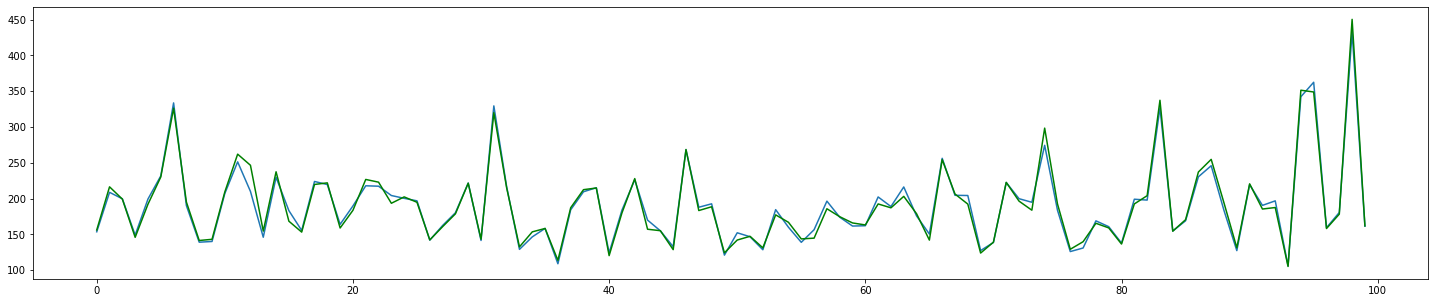

In [67]:
#Visual check on the predictions (Validation Set)
plt.figure(figsize=(25, 5))
plt.plot(list(range(100)), Y_dts_val[25000:25100])
plt.plot(list(range(100)), val_pred[25000:25100], color='g')

In [68]:
# Filling nan values before predicting DTS
X_train_DTS = train_prep.drop(['DTS'], axis=1)
X_train_DTS2 = X_train_DTS.apply(lambda x: x.fillna(x.median()), axis=0)

X_test_DTS = test_prep.drop(['DTS'], axis=1)
X_test_DTS2 = X_test_DTS.apply(lambda x: x.fillna(x.median()), axis=0)

X_hidden_DTS = hidden_prep.drop(['DTS'], axis=1)
X_hidden_DTS2 = X_hidden_DTS.apply(lambda x: x.fillna(x.median()), axis=0)

#Predicting DTS (COMPLETE DATASETS)
train_prep['DTS_pred'] = model1000.predict(X_train_DTS2)
test_prep['DTS_pred'] = model1000.predict(X_test_DTS2)
hidden_prep['DTS_pred'] = model1000.predict(X_hidden_DTS2)

#Inputing nan values in DTS with DTS_PREDICTED
train_prep['DTS_COMB'] = train_prep['DTS']
train_prep['DTS_COMB'].fillna(train_prep['DTS_pred'], inplace=True)

test_prep['DTS_COMB'] = test_prep['DTS']
test_prep['DTS_COMB'].fillna(test_prep['DTS_pred'], inplace=True)

hidden_prep['DTS_COMB'] = hidden_prep['DTS']
hidden_prep['DTS_COMB'].fillna(hidden_prep['DTS_pred'], inplace=True)

In [69]:
X_dts.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DRHO',
       'GROUP_encoded', 'FORMATION_encoded', 'WELL_encoded',
       'Lithology_encoded'],
      dtype='object')

In [70]:
['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO',
       'GROUP_encoded', 'FORMATION_encoded', 'WELL_encoded',
       'Lithology_encoded']

['DEPTH_MD',
 'X_LOC',
 'Y_LOC',
 'Z_LOC',
 'CALI',
 'RSHA',
 'RMED',
 'RDEP',
 'RHOB',
 'GR',
 'NPHI',
 'PEF',
 'DTC',
 'SP',
 'BS',
 'ROP',
 'DTS',
 'DRHO',
 'GROUP_encoded',
 'FORMATION_encoded',
 'WELL_encoded',
 'Lithology_encoded']

# Feature selection


In [71]:
#univariate feature selection based on variance prior normalization
train_imp.var().sort_values(ascending=False)

Y_LOC                1.630050e+10
X_LOC                1.183845e+09
ROP                  1.086799e+06
DEPTH_MD             9.943722e+05
Z_LOC                9.341349e+05
RDEP                 1.286276e+04
RSHA                 5.478753e+03
SP                   4.333577e+03
RMED                 2.889932e+03
GR                   1.171795e+03
WELL_encoded         1.029100e+03
DTC                  8.382095e+02
DTS                  7.878111e+02
FORMATION_encoded    5.732392e+02
PEF                  6.985704e+01
DRHO                 4.719175e+01
CALI                 1.337578e+01
GROUP_encoded        9.834499e+00
BS                   6.492793e+00
Lithology_encoded    2.958274e+00
RHOB                 5.546984e-02
NPHI                 1.113932e-02
dtype: float64

In [72]:
import sklearn.feature_selection
x_header=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO',
       'GROUP_encoded', 'FORMATION_encoded', 'WELL_encoded']
y_header=['Lithology_encoded']
x_train = train_imp[x_header]
y_train = train_imp[y_header]

feature = sklearn.feature_selection.SelectKBest(k=15)
selected_features = feature.fit(x_train, y_train)

data = pd.DataFrame({'Feature':list(x_train.columns), 'Scores':selected_features.scores_})
data = data.sort_values(by='Scores', ascending=False)
display(data.head(20))

C:\Users\Ayori\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Feature        Scores
7                RDEP  58466.905990
9                  GR  30989.161981
10               NPHI  26283.435828
12                DTC  21921.793977
5                RSHA  19570.572074
8                RHOB   9618.469484
2               Y_LOC   7723.230331
18      GROUP_encoded   6271.927504
20       WELL_encoded   6172.054183
19  FORMATION_encoded   3690.058986
0            DEPTH_MD   3029.220186
3               Z_LOC   2970.368774
16                DTS   2614.047492
4                CALI   2318.560951
14                 BS   1463.302955
1               X_LOC   1072.678467
6                RMED    399.446953
11                PEF    342.075575
13                 SP    334.400425
15                ROP     44.671834

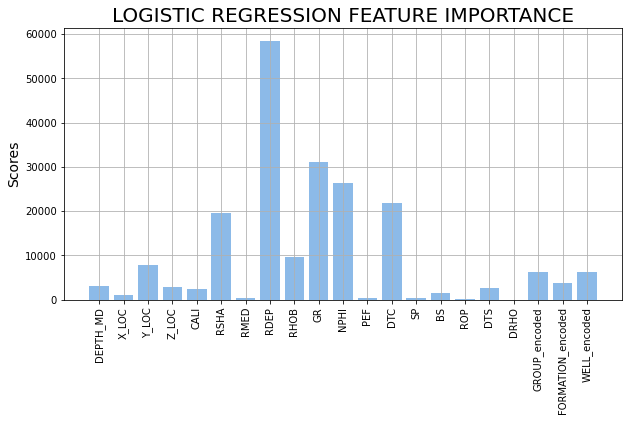

In [73]:
#Visualizing Accuracies
f, ax = plt.subplots(figsize=(10,5))
x_pos = np.arange(len(x_train.columns))

#Create Bars
ax.bar(x_pos, np.array(selected_features.scores_), color=(0.5, 0.7, 0.9, 0.9))
ax.set_ylabel('Scores', size=14)
ax.set_title('LOGISTIC REGRESSION FEATURE IMPORTANCE', size=20)

plt.xticks(x_pos, x_train.columns, rotation=90)
plt.grid(True)
plt.show()

In [74]:
#Ranking Features based on the K-Best Method
from sklearn.feature_selection import SelectKBest, chi2, f_classif
selected_features = SelectKBest(f_classif, k=5 ).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'feature': list(x_train.columns),
                                     'scores': selected_features.scores_})
df_new = selected_features_df.sort_values(by='scores', ascending=False)

C:\Users\Ayori\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



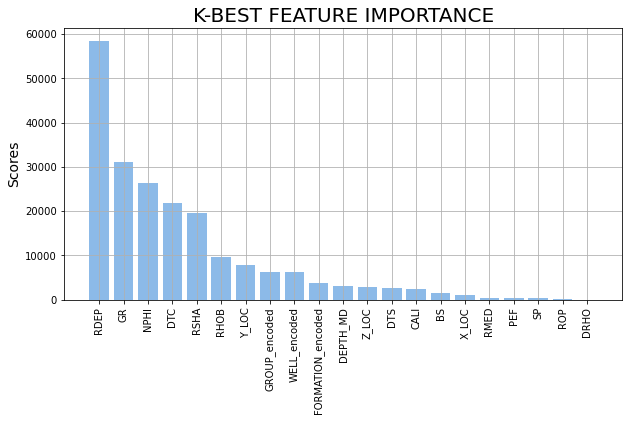

In [75]:
#Ploting K-Best Feature Importances
#Visualizing Accuracies
f, ax = plt.subplots(figsize=(10,5))
x_pos = np.arange(len(x_train.columns))

#Create Bars
ax.bar(x_pos, df_new.scores, color=(0.5, 0.7, 0.9, 0.9))
ax.set_ylabel('Scores', size=14)
ax.set_title('K-BEST FEATURE IMPORTANCE', size=20)

plt.xticks(x_pos, df_new.feature, rotation=90)
plt.grid(True)
plt.show()

C:\Users\Ayori\AppData\Local\Temp/ipykernel_16448/3325240931.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



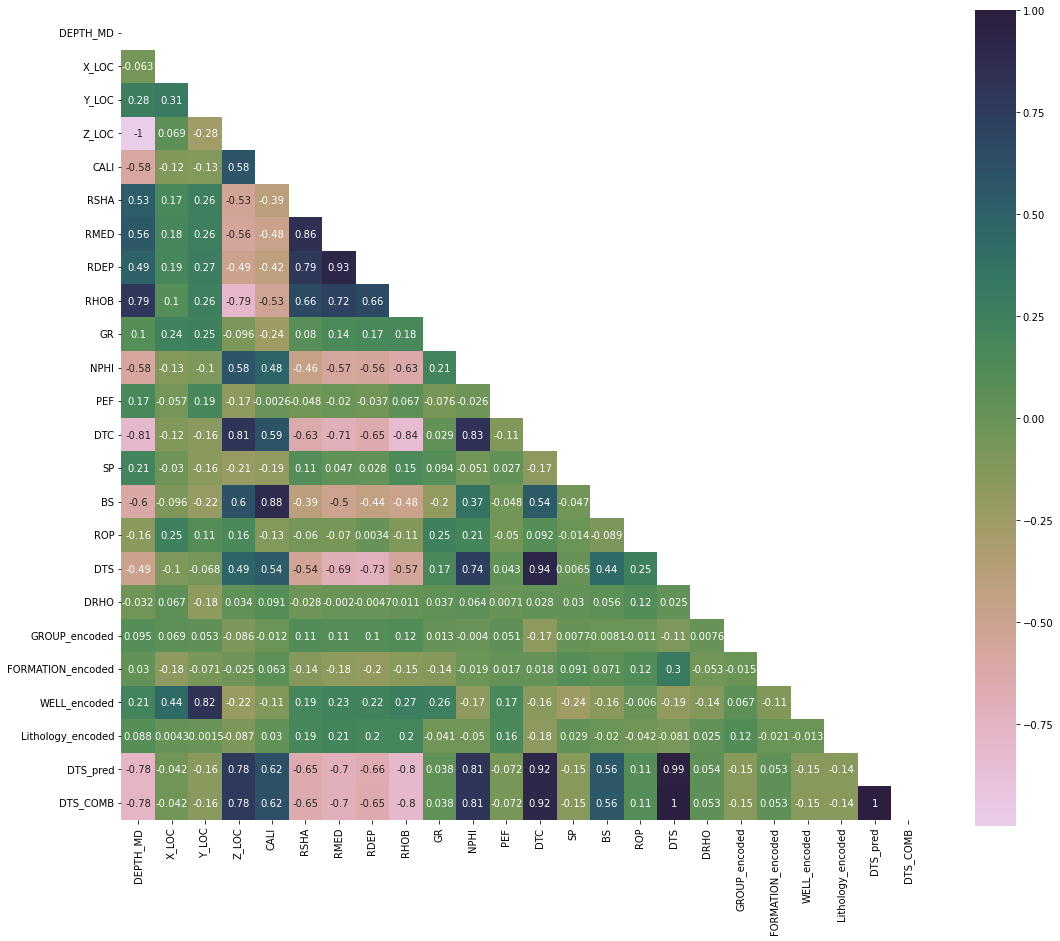

In [76]:
#Spearman's Correlation 

# Generate a mask for the upper triangle
mask = np.zeros_like(train_prep.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(18,15))
sns.heatmap(train_prep.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=1, square=True)

plt.show()

In [77]:
#using a cut off to select features - Spearman Correlation
def spearmancorr(data, threshold):
    column_corr = set()  #Set all the names of the correlates columns
    corr_matrix = data.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                column_corr.add(colname)
    return column_corr

In [78]:
corr_features = spearmancorr(train_prep, 0.8)
corr_features

{'BS',
 'DTC',
 'DTS',
 'DTS_COMB',
 'DTS_pred',
 'RDEP',
 'RMED',
 'WELL_encoded',
 'Z_LOC'}

In [79]:
corr_features = spearmancorr(train_prep, 0.65)
corr_features

{'BS',
 'DTC',
 'DTS',
 'DTS_COMB',
 'DTS_pred',
 'RDEP',
 'RHOB',
 'RMED',
 'WELL_encoded',
 'Z_LOC'}

In [2]:
#feature importance using random forest
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(x_train,y_train.values.ravel())
train_feature = x_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='r', align='center')
plt.yticks(range(len(indices)),[train_feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'x_train' is not defined

In [ ]:
#Creating a pair plot of some features
sample_data = train.sample(n=150000, replace=False) 
features_pair_plot = ['GR', 'CALI', 'SP', 'RDEP', 'DTC', 'NPHI', 'RHOB','RMED','RSHA']
sns.pairplot(sample_data, vars=features_pair_plot, diag_kind='kde', plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

# Outlier removal

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
train_imp1= train_imp.copy()

#Method 1: Local Oultlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(train_imp1)
mask = yhat != -1
train_out = train_imp1[mask]
#display(train_data_lof)

In [ ]:
train_out

In [ ]:
#Method 2: Isolation Forest
isolation = IsolationForest(contamination=0.1)
yhat1 = isolation.fit_predict(train_imp1)
mask1 = yhat1 != -1
train_iso = train_imp1[mask1]

In [ ]:
train_iso

In [ ]:
#Method 3: Standard Deviation Method (traditional)
train_std = train_imp1[np.abs(train_imp1-train_imp1.mean()) <= (3*train_imp1.std())]
train_std = train_std.dropna()   

In [ ]:
#Method 4: One-class SVM
svm = OneClassSVM(nu=0.1)
that = svm.fit_predict(train_imp1)
mask = that != -1
train_svm = train_imp1[mask]



In [ ]:
#Checking outlier revoved data lenght
print('Number of points before outliers removed                       :', len(train_imp1))
print('Number of points after outliers removed with Outlier Factor    :', len(train_out))
print('Number of points after outliers removed with Isolation Forest  :', len(train_iso))
print('Number of points after outliers removed with Standard Deviation:', len(train_std))
print('Number of points after outliers removed with One-class SVM     :', len(train_svm))

In [ ]:
#Box plotting data after outlier removal
box_features = ['RDEP','RMED', 'RSHA','GR', 'DTC', 'NPHI', 'RHOB', 'BS', 'CALI','SP']

plt.figure(figsize=(15,10))

#Before outliers removal
plt.subplot(3,2,1)
train_imp1[box_features].boxplot()
plt.ylim([-15, 15])
plt.title('Before Outlier Removal', size=15)

#Methods of outlier removal
plt.subplot(3,2,2)
train_std[box_features].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
train_iso[box_features].boxplot()
plt.ylim([-10, 10])
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,5)
train_out[box_features].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
train_svm[box_features].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

In [ ]:
#Pair plot after outlier removal
pairplot_features = ['RDEP','RMED', 'RSHA','GR', 'DTC', 'NPHI', 'RHOB', 'BS', 'CALI','SP']
sns.pairplot(train_iso, diag_kind='kde', vars = pairplot_features, plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

# Normalisation

In [ ]:
#Inputing missing values by introducing median 
from sklearn.impute import SimpleImputer
miss = SimpleImputer(missing_values=np.nan, strategy='median')
miss.fit(test_prep1)
test_imp = miss.fit_transform(test_prep1)
test_imp=pd.DataFrame(test_imp, columns=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO',
         'GROUP_encoded',
       'FORMATION_encoded', 'WELL_encoded','Lithology_encoded'])
test_imp

In [ ]:
#Inputing missing values by introducing median 
from sklearn.impute import SimpleImputer
miss = SimpleImputer(missing_values=np.nan, strategy='median')
miss.fit(hidden_prep1)
hidden_imp = miss.fit_transform(hidden_prep1)
hidden_imp=pd.DataFrame(hidden_imp, columns=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DRHO',
         'GROUP_encoded',
       'FORMATION_encoded', 'WELL_encoded','Lithology_encoded'])
hidden_imp

In [ ]:
x_train.iloc[:,:18]

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
x_test = test_imp[x_header]
y_test = test_imp[y_header]
x_hidden = hidden_imp[x_header]
y_hidden = hidden_imp[y_header]
##Min-Max scaler 
scaler = MinMaxScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_hidden_scaled = x_hidden.copy()

x_train_scaled.iloc[:,:18] = scaler.fit_transform(x_train_scaled.iloc[:,:18])
x_test_scaled.iloc[:,:18] = scaler.transform(x_test_scaled.iloc[:,:18])
x_hidden_scaled.iloc[:,:18] = scaler.transform(x_hidden_scaled.iloc[:,:18])

In [ ]:
##standard scaler 
sc = StandardScaler()
x_train_sc = x_train.copy()
x_test_sc = x_test.copy()
x_hidden_sc = x_hidden.copy()

x_train_sc.iloc[:,:18] = sc.fit_transform(x_train_sc.iloc[:,:18])
x_test_sc.iloc[:,:18] = sc.transform(x_test_sc.iloc[:,:18])
x_hidden_sc.iloc[:,:18] = sc.transform(x_hidden_sc.iloc[:,:18])

In [ ]:
#Robustscaler
from sklearn.preprocessing import RobustScaler
rs= RobustScaler()
x_train_rs = x_train.copy()
x_test_rs = x_test.copy()
x_hidden_rs = x_hidden.copy()

x_train_rs.iloc[:,:18] = rs.fit_transform(x_train_rs.iloc[:,:18])
x_test_rs.iloc[:,:18] = rs.transform(x_test_rs.iloc[:,:18])
x_hidden_rs.iloc[:,:18] = rs.transform(x_hidden_rs.iloc[:,:18])

In [ ]:
##Normalization
norm = Normalizer()
x_train_norm = x_train.copy()
x_test_norm = x_test.copy()
x_hidden_norm = x_hidden.copy()

x_train_norm.iloc[:,:18] = norm.fit_transform(x_train_norm.iloc[:,:18])
x_test_norm.iloc[:,:18] = norm.transform(x_test_norm.iloc[:,:18])
x_hidden_norm.iloc[:,:18] = norm.transform(x_hidden_norm.iloc[:,:18])

# Box plotting data after Scaling

In [ ]:
#Box plotting data after Scaling ---- NO LOG

#box_features = ['RDEP','RMED', 'RSHA','GR', 'DTC', 'NPHI', 'RHOB', 'BS', 'CALI']
box_features = ['GR', 'CALI', 'SP', 'RDEP', 'DTC', 'NPHI', 'RHOB','RMED','RSHA']
plt.figure(figsize=(15,10))

# 0. Before Normalization
plt.subplot(3,2,1)
x_train[box_features].boxplot()
plt.title('Before any type of Scaling', size=15)

# 1. After MinMax Scaler
plt.subplot(3,2,2)
x_train_scaled[box_features].boxplot()
plt.title('After MinMax Scaler', size=15)

# 2. After Standardization
plt.subplot(3,2,3)
x_train_sc[box_features].boxplot()
plt.ylim([-15, 40])
plt.title('After Standardization', size=15)

# 3. After robust scaler
plt.subplot(3,2,4)
x_train_norm[box_features].boxplot()
plt.title('After Robust scaler', size=15)

# 4. After Normalization
plt.subplot(3,2,5)
x_train_norm[box_features].boxplot()
plt.title('After Normalization', size=15)

plt.tight_layout(1.7)
plt.show()

# Comparing the performance of scaling

In [ ]:
#Fitting a logistic regression model  #### KEEP THIS ONE

lr = LogisticRegression(C=1e-3, solver="saga", max_iter=10000, verbose=1)
#lr = LogisticRegression()

#Score with no Scale/Normalization
lr.fit(x_train, y_train.values.ravel())
print('The acuracy score withouth Normalization/scaling', lr.score(x_test, y_test))

In [ ]:
# 1. Score after Scaling
lr.fit(x_train_scaled, y_train.values.ravel())
print('1. The accuracy score after Scaling', lr.score(x_test_scaled, y_test))


In [ ]:
# 2. Score after Standardization
lr.fit(x_train_sc, y_train.values.ravel())
print('2. The acuracy score after Standardization', lr.score(x_test_sc, y_test))

In [ ]:
# 3. score after robustscaler

lr.fit(x_train_rs, y_train.values.ravel())
print('3. The acuracy score after Standardization', lr.score(x_test_rs, y_test))

In [ ]:
# 4. Score after Normalization
lr.fit(x_train_norm, y_train.values.ravel())
print('4. The accuracy score after Normalization', lr.score(x_test_norm, y_test))

In [ ]:
y_test

In [ ]:
#can we make new features by combining previous ones?
import featuretools as ft
from woodwork.logical_types import Categorical
df_features = train1
es = ft.EntitySet(id = 'observations')
es = es.add_dataframe(dataframe_name='observations',dataframe = df_features.reset_index(), 
                              index = 'index',
                              logical_types={"FORMATION": Categorical,
                                              "GROUP": Categorical})
features, ft_names = ft.dfs(entityset = es, target_dataframe_name = 'observations', 
                            trans_primitives = ['multiply_numeric'],
                            #trans_primitives = ['add_numeric', 'multiply_numeric', 
                            #                    'subtract_numeric', 'divide_numeric', 'diff'],
                            max_depth=2)
features.columns

Volume of shale (vsh): gamma ray (gr) , spontaneous potential (sp)
Porosity (phi): neutron porosity (nphi), density (den), sonic (dt)
Water saturation (sw): deep resistivity (deep_res)

In [ ]:
# Volume of shale by gamma ray

gr_cl = 17    # gr clean or minimum
gr_sh = 157    # gr of shales or maximum
GR= train_imp1['GR']
vsh = (GR - gr_cl)/(gr_sh - gr_cl)    # Similar to the unity-base normalization

vsh = np.maximum(np.minimum(vsh, 1), 0.0001) 

In [ ]:
vsh

In [ ]:
# Total sonic porosity

dt_qz = 56    # sonic of quartz
dt_f = 218    # sonic of water

dt= train_imp1['DTC']

sphi = (dt - dt_qz)/(dt_f - dt_qz)

sphi = np.maximum(np.minimum(sphi, 1), 0.0001)

In [ ]:
sphi

In [ ]:
# local function for main statistical parameters

def local_stat(l):
    
    l_range = np.max(l) - np.min(l)

    # Stat of l
    
    print('samples     =', len(l))
    print('range       =', l_range)
    print('min         =', np.min(l))
    print('p33         =', np.percentile(l,33))
    print('mean        =', np.mean(l))    
    print('p66         =', np.percentile(l,66))    
    print('max         =', np.max(l))
    print('std         =', np.std(l))
    print('mean + 3std =', (np.mean(l) + 3*np.std(l)))

In [ ]:
# Total sonic porosity of the shale

local_stat(sphi)
sphi_shale = sphi[GR > 100]

local_stat(sphi_shale)

In [ ]:
# Effective sonic porosity

sphi_sh = 0.082

eff_sphi = sphi - sphi_sh*vsh

eff_sphi = np.maximum(np.minimum(eff_sphi, 1), 0.0001)

In [ ]:
from sklearn.model_selection import train_test_split

# NPHI training Data
train_nphi = train_prep[train_prep.NPHI.notna()]

#Labels and faatures
X_nphi = train_nphi.drop(['NPHI'], axis=1)
Y_nphi = train_nphi['NPHI']

#Imputation
X_nphi_inp = X_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

#Spliting into nphi_train and nphi_validation sets
X_nphi_train, X_nphi_val, Y_nphi_train, Y_nphi_val = train_test_split(X_nphi_inp, Y_nphi, test_size=0.3, random_state=42)

print('Splitted training data shape is {} and validation data shape is {}'.format(X_nphi_train.shape, X_nphi_val.shape))
#Predicting NPHI
from sklearn.metrics import max_error
from xgboost import XGBRegressor

model1000 = XGBRegressor()
model1000.fit(X_nphi_train, Y_nphi_train.values.ravel(), early_stopping_rounds=100, eval_set=[(X_nphi_val, Y_nphi_val)], verbose=100)

train_pred1 = model1000.predict(X_nphi_train)
val_pred1 = model1000.predict(X_nphi_val)

print('Train error:', max_error(Y_nphi_train, train_pred1))
print('Validation error:', max_error(Y_nphi_val, val_pred1))
#Visual check on the predictions (Validation Set)
plt.figure(figsize=(25, 5))
plt.plot(list(range(100)), Y_nphi_val[25000:25100])
plt.plot(list(range(100)), val_pred1[25000:25100], color='g')

# Filling nan values before predicting nphi
X_train_nphi = train_prep.drop(['NPHI'], axis=1)
X_train_nphi2 = X_train_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

X_test_nphi = test_prep.drop(['NPHI'], axis=1)
X_test_nphi2 = X_test_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

X_hidden_nphi = hidden_prep.drop(['NPHI'], axis=1)
X_hidden_nphi2 = X_hidden_nphi.apply(lambda x: x.fillna(x.median()), axis=0)

#Predicting nphi (COMPLETE DATASETS)
train_prep['NPHI_pred'] = model1000.predict(X_train_nphi2)
test_prep['NPHI_pred'] = model1000.predict(X_test_nphi2)
hidden_prep['NPHI_pred'] = model1000.predict(X_hidden_nphi2)

#Inputing nan values in nphi with nphi_PREDICTED
train_prep['NPHI_COMB'] = train_prep['NPHI']
train_prep['NPHI_COMB'].fillna(train_prep['NPHI_pred'], inplace=True)

test_prep['NPHI_COMB'] = test_prep['NPHI']
test_prep['NPHI_COMB'].fillna(test_prep['NPHI_pred'], inplace=True)

hidden_prep['NPHI_COMB'] = hidden_prep['NPHI']
hidden_prep['NPHI_COMB'].fillna(hidden_prep['NPHI_pred'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# RHOB training Data
train_rhob = train_prep[train_prep.RHOB.notna()]

#Labels and faatures
X_rhob = train_rhob.drop(['RHOB'], axis=1)
Y_rhob = train_rhob['RHOB']

#Imputation
X_rhob_inp = X_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

#Spliting into rhob_train and rhob_validation sets
X_rhob_train, X_rhob_val, Y_rhob_train, Y_rhob_val = train_test_split(X_rhob_inp, Y_rhob, test_size=0.3, random_state=42)

print('Splitted training data shape is {} and validation data shape is {}'.format(X_rhob_train.shape, X_rhob_val.shape))
#Predicting rhob
from sklearn.metrics import max_error
from xgboost import XGBRegressor

model1000 = XGBRegressor()
model1000.fit(X_rhob_train, Y_rhob_train.values.ravel(), early_stopping_rounds=100, eval_set=[(X_rhob_val, Y_rhob_val)], verbose=100)

train_pred2 = model1000.predict(X_rhob_train)
val_pred2 = model1000.predict(X_rhob_val)

print('Train error:', max_error(Y_rhob_train, train_pred2))
print('Validation error:', max_error(Y_rhob_val, val_pred2))
#Visual check on the predictions (Validation Set)
plt.figure(figsize=(25, 5))
plt.plot(list(range(100)), Y_rhob_val[25000:25100])
plt.plot(list(range(100)), val_pred2[25000:25100], color='g')

# Filling nan values before predicting rhob
X_train_rhob = train_prep.drop(['RHOB'], axis=1)
X_train_rhob2 = X_train_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

X_test_rhob = test_prep.drop(['RHOB'], axis=1)
X_test_rhob2 = X_test_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

X_hidden_rhob = hidden_prep.drop(['RHOB'], axis=1)
X_hidden_rhob2 = X_hidden_rhob.apply(lambda x: x.fillna(x.median()), axis=0)

#Predicting rhob (COMPLETE DATASETS)
train_prep['RHOB_pred'] = model1000.predict(X_train_rhob2)
test_prep['RHOB_pred'] = model1000.predict(X_test_rhob2)
hidden_prep['RHOB_pred'] = model1000.predict(X_hidden_rhob2)

#Inputing nan values in rhob with rhob_PREDICTED
train_prep['RHOB_COMB'] = train_prep['RHOB']
train_prep['RHOB_COMB'].fillna(train_prep['RHOB_pred'], inplace=True)

test_prep['RHOB_COMB'] = test_prep['RHOB']
test_prep['RHOB_COMB'].fillna(test_prep['RHOB_pred'], inplace=True)

hidden_prep['RHOB_COMB'] = hidden_prep['RHOB']
hidden_prep['RHOB_COMB'].fillna(hidden_prep['RHOB_pred'], inplace=True)